Name: Vedant Modi
<br>
Palumbo,Filippo, Gallicchio,Claudio, Pucci,Rita, and Micheli,Alessio. (2016). Activity Recognition system based on Multisensor data fusion (AReM). UCI Machine Learning Repository. https://doi.org/10.24432/C5SS33.

## 1. Time Series Classification Part 1: Feature Creation/Extraction

### (a) Download Data

Package imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bootstrapped import bootstrap
from bootstrapped.stats_functions import std
from bootstrapped import compare_functions as bs_compare
from bootstrapped import stats_functions as bs_stats
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.utils import resample

Get the AReM Data Set

In [2]:
bending1_df = {}

for i in range(1, 8):
    filename = f"AReM/bending1/dataset{i}.csv"
    df = pd.read_csv(filename, skiprows=range(1, 4), header=1)
    bending1_df[f'bending1_df{i}'] = df

print(bending1_df.keys())
bending1_df['bending1_df5'].columns

dict_keys(['bending1_df1', 'bending1_df2', 'bending1_df3', 'bending1_df4', 'bending1_df5', 'bending1_df6', 'bending1_df7'])


Index(['# Columns: time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13',
       'avg_rss23', 'var_rss23'],
      dtype='object')

In [3]:
bending2_df = {}

for i in range(1, 7):
    filename = f"AReM/bending2/dataset{i}.csv"
    df = pd.read_csv(filename, skiprows=range(1, 4), header=1)
    bending2_df[f'bending2_df{i}'] = df

print(bending2_df.keys())
bending2_df['bending2_df5'].columns

dict_keys(['bending2_df1', 'bending2_df2', 'bending2_df3', 'bending2_df4', 'bending2_df5', 'bending2_df6'])


Index(['# Columns: time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13',
       'avg_rss23', 'var_rss23'],
      dtype='object')

In [4]:
bending2_df['bending2_df4']

# Columns: time  avg_rss12  var_rss12  avg_rss13  \
0         0 32.50 0.50 0.00 0.00 19.00 1.00         NaN        NaN        NaN   
1       250 32.50 0.50 0.00 0.00 18.50 0.50         NaN        NaN        NaN   
2       500 32.75 0.43 1.00 0.00 18.00 0.00         NaN        NaN        NaN   
3       750 32.50 0.50 0.00 0.00 17.50 0.50         NaN        NaN        NaN   
4      1000 32.50 0.50 7.50 0.50 17.50 0.87         NaN        NaN        NaN   
..                                       ...        ...        ...        ...   
475  118750 28.67 0.47 4.67 1.25 17.33 0.47         NaN        NaN        NaN   
476  119000 27.50 0.50 5.50 2.50 17.25 1.30         NaN        NaN        NaN   
477  119250 28.00 0.00 6.67 0.94 17.00 1.00         NaN        NaN        NaN   
478  119500 28.00 0.00 5.00 0.82 17.00 0.71         NaN        NaN        NaN   
479  119750 28.00 0.00 0.00 0.00 17.00 1.00         NaN        NaN        NaN   

     var_rss13  avg_rss23  var_rss23  
0          NaN        NaN        NaN  
1          NaN        NaN        NaN  
2          NaN        NaN        NaN  
3          NaN        NaN        NaN  
4          NaN        NaN        NaN  
..         ...        ...        ...  
475        NaN        NaN        NaN  
476        NaN        NaN        NaN  
477        NaN        NaN        NaN  
478        NaN        NaN        NaN  
479        NaN        NaN        NaN  

[480 rows x 7 columns]

In [5]:
bending2_df['bending2_df4'].columns

Index(['# Columns: time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13',
       'avg_rss23', 'var_rss23'],
      dtype='object')

In [6]:
for i in range (0, 480):
    split_values = [float(value) for value in bending2_df['bending2_df4']["# Columns: time"][i].split()]
    bending2_df['bending2_df4']["# Columns: time"][i] = split_values[0]
    bending2_df['bending2_df4']["avg_rss12"][i] = split_values[1]
    bending2_df['bending2_df4']["var_rss12"][i] = split_values[2]
    bending2_df['bending2_df4']["avg_rss13"][i] = split_values[3]
    bending2_df['bending2_df4']["var_rss13"][i] = split_values[4]
    bending2_df['bending2_df4']["avg_rss23"][i] = split_values[5]
    bending2_df['bending2_df4']["var_rss23"][i] = split_values[6]

In [7]:
bending2_df['bending2_df4']

# Columns: time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  \
0               0.0      32.50       0.50       0.00       0.00      19.00   
1             250.0      32.50       0.50       0.00       0.00      18.50   
2             500.0      32.75       0.43       1.00       0.00      18.00   
3             750.0      32.50       0.50       0.00       0.00      17.50   
4            1000.0      32.50       0.50       7.50       0.50      17.50   
..              ...        ...        ...        ...        ...        ...   
475        118750.0      28.67       0.47       4.67       1.25      17.33   
476        119000.0      27.50       0.50       5.50       2.50      17.25   
477        119250.0      28.00       0.00       6.67       0.94      17.00   
478        119500.0      28.00       0.00       5.00       0.82      17.00   
479        119750.0      28.00       0.00       0.00       0.00      17.00   

     var_rss23  
0         1.00  
1         0.50  
2         0.00  
3         0.50  
4         0.87  
..         ...  
475       0.47  
476       1.30  
477       1.00  
478       0.71  
479       1.00  

[480 rows x 7 columns]

In [8]:
cycling_df = {}

for i in range(1, 16):
    filename = f"AReM/cycling/dataset{i}.csv"
    df = pd.read_csv(filename, skiprows=range(1, 4), header=1, on_bad_lines='skip')
    cycling_df[f'cycling_df{i}'] = df

print(cycling_df.keys())
cycling_df['cycling_df5'].columns

dict_keys(['cycling_df1', 'cycling_df2', 'cycling_df3', 'cycling_df4', 'cycling_df5', 'cycling_df6', 'cycling_df7', 'cycling_df8', 'cycling_df9', 'cycling_df10', 'cycling_df11', 'cycling_df12', 'cycling_df13', 'cycling_df14', 'cycling_df15'])


Index(['# Columns: time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13',
       'avg_rss23', 'var_rss23'],
      dtype='object')

In [9]:
lying_df = {}

for i in range(1, 16):
    filename = f"AReM/lying/dataset{i}.csv"
    df = pd.read_csv(filename, skiprows=range(1, 4), header=1)
    lying_df[f'lying_df{i}'] = df

print(lying_df.keys())
lying_df['lying_df5'].columns

dict_keys(['lying_df1', 'lying_df2', 'lying_df3', 'lying_df4', 'lying_df5', 'lying_df6', 'lying_df7', 'lying_df8', 'lying_df9', 'lying_df10', 'lying_df11', 'lying_df12', 'lying_df13', 'lying_df14', 'lying_df15'])


Index(['# Columns: time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13',
       'avg_rss23', 'var_rss23'],
      dtype='object')

In [10]:
sitting_df = {}

for i in range(1, 16):
    filename = f"AReM/sitting/dataset{i}.csv"
    df = pd.read_csv(filename, skiprows=range(1, 4), header=1)
    sitting_df[f'sitting_df{i}'] = df

print(sitting_df.keys())
sitting_df['sitting_df5'].columns

dict_keys(['sitting_df1', 'sitting_df2', 'sitting_df3', 'sitting_df4', 'sitting_df5', 'sitting_df6', 'sitting_df7', 'sitting_df8', 'sitting_df9', 'sitting_df10', 'sitting_df11', 'sitting_df12', 'sitting_df13', 'sitting_df14', 'sitting_df15'])


Index(['# Columns: time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13',
       'avg_rss23', 'var_rss23'],
      dtype='object')

In [11]:
standing_df = {}

for i in range(1, 16):
    filename = f"AReM/standing/dataset{i}.csv"
    df = pd.read_csv(filename, skiprows=range(1, 4), header=1)
    standing_df[f'standing_df{i}'] = df

print(standing_df.keys())
standing_df['standing_df5'].columns

dict_keys(['standing_df1', 'standing_df2', 'standing_df3', 'standing_df4', 'standing_df5', 'standing_df6', 'standing_df7', 'standing_df8', 'standing_df9', 'standing_df10', 'standing_df11', 'standing_df12', 'standing_df13', 'standing_df14', 'standing_df15'])


Index(['# Columns: time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13',
       'avg_rss23', 'var_rss23'],
      dtype='object')

In [12]:
walking_df = {}

for i in range(1, 16):
    filename = f"AReM/walking/dataset{i}.csv"
    df = pd.read_csv(filename, skiprows=range(1, 4), header=1)
    walking_df[f'walking_df{i}'] = df

print(walking_df.keys())
walking_df['walking_df5'].columns

dict_keys(['walking_df1', 'walking_df2', 'walking_df3', 'walking_df4', 'walking_df5', 'walking_df6', 'walking_df7', 'walking_df8', 'walking_df9', 'walking_df10', 'walking_df11', 'walking_df12', 'walking_df13', 'walking_df14', 'walking_df15'])


Index(['# Columns: time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13',
       'avg_rss23', 'var_rss23'],
      dtype='object')

### (b) Test and Train Data

In [13]:
test_dataset = {"bending1_1": bending1_df['bending1_df1'], "bending1_2": bending1_df['bending1_df2'],
                "bending2_1": bending2_df['bending2_df1'], "bending2_2": bending2_df['bending2_df2'],
                "cycling_1": cycling_df['cycling_df1'], "cycling_2": cycling_df['cycling_df2'], "cycling_3": cycling_df['cycling_df3'],
                "lying_1": lying_df['lying_df1'], "lying_2": lying_df['lying_df1'], "lying_3": lying_df['lying_df3'],
                "sitting_1": sitting_df['sitting_df1'], "sitting_2": sitting_df['sitting_df2'], "sitting_3": sitting_df['sitting_df3'],
                "standing_1": standing_df['standing_df1'], "standing_2": standing_df['standing_df2'], "standing_3": standing_df['standing_df3'],
                "walking_1": walking_df['walking_df1'], "walking_2": walking_df['walking_df2'], "walking_3": walking_df['walking_df3']
               }
test_dataset.keys()

dict_keys(['bending1_1', 'bending1_2', 'bending2_1', 'bending2_2', 'cycling_1', 'cycling_2', 'cycling_3', 'lying_1', 'lying_2', 'lying_3', 'sitting_1', 'sitting_2', 'sitting_3', 'standing_1', 'standing_2', 'standing_3', 'walking_1', 'walking_2', 'walking_3'])

In [14]:
train_dataset = {"bending1_3": bending1_df['bending1_df3'], "bending1_4": bending1_df['bending1_df4'], "bending1_5": bending1_df['bending1_df5'], "bending1_6": bending1_df['bending1_df6'],  "bending1_7": bending1_df['bending1_df7'], 
                "bending2_3": bending2_df['bending2_df3'], "bending2_4": bending2_df['bending2_df4'], "bending2_5": bending2_df['bending2_df5'], "bending2_6": bending2_df['bending2_df6'],
                "cycling_4": cycling_df['cycling_df4'], "cycling_5": cycling_df['cycling_df5'], "cycling_6": cycling_df['cycling_df6'], "cycling_7": cycling_df['cycling_df7'], "cycling_8": cycling_df['cycling_df8'], "cycling_9": cycling_df['cycling_df9'], "cycling_10": cycling_df['cycling_df10'], "cycling_11": cycling_df['cycling_df11'], "cycling_12": cycling_df['cycling_df12'], "cycling_13": cycling_df['cycling_df13'], "cycling_14": cycling_df['cycling_df14'], "cycling_15": cycling_df['cycling_df15'],
                "lying_4": lying_df['lying_df4'], "lying_5": lying_df['lying_df5'], "lying_6": lying_df['lying_df6'], "lying_7": lying_df['lying_df7'], "lying_8": lying_df['lying_df8'], "lying_9": lying_df['lying_df9'], "lying_10": lying_df['lying_df10'], "lying_11": lying_df['lying_df11'], "lying_12": lying_df['lying_df12'], "lying_13": lying_df['lying_df13'], "lying_14": lying_df['lying_df14'], "lying_15": lying_df['lying_df15'],
                "sitting_4": sitting_df['sitting_df4'], "sitting_5": sitting_df['sitting_df5'], "sitting_6": sitting_df['sitting_df6'], "sitting_7": sitting_df['sitting_df7'], "sitting_8": sitting_df['sitting_df8'], "sitting_9": sitting_df['sitting_df9'], "sitting_10": sitting_df['sitting_df10'], "sitting_11": sitting_df['sitting_df11'], "sitting_12": sitting_df['sitting_df12'], "sitting_13": sitting_df['sitting_df13'], "sitting_14": sitting_df['sitting_df14'], "sitting_15": sitting_df['sitting_df15'],
                "standing_4": standing_df['standing_df4'], "standing_5": standing_df['standing_df5'], "standing_6": standing_df['standing_df6'], "standing_7": standing_df['standing_df7'], "standing_8": standing_df['standing_df8'], "standing_9": standing_df['standing_df9'], "standing_10": standing_df['standing_df10'], "standing_11": standing_df['standing_df11'], "standing_12": standing_df['standing_df12'], "standing_13": standing_df['standing_df13'], "standing_14": standing_df['standing_df14'], "standing_15": standing_df['standing_df15'],
                "walking_4": walking_df['walking_df4'], "walking_5": walking_df['walking_df5'], "walking_6": walking_df['walking_df6'], "walking_7": walking_df['walking_df7'], "walking_8": walking_df['walking_df8'], "walking_9": walking_df['walking_df9'], "walking_10": walking_df['walking_df10'], "walking_11": walking_df['walking_df11'], "walking_12": walking_df['walking_df12'], "walking_13": walking_df['walking_df13'], "walking_14": walking_df['walking_df14'], "walking_15": walking_df['walking_df15'],
               }
train_dataset.keys()

dict_keys(['bending1_3', 'bending1_4', 'bending1_5', 'bending1_6', 'bending1_7', 'bending2_3', 'bending2_4', 'bending2_5', 'bending2_6', 'cycling_4', 'cycling_5', 'cycling_6', 'cycling_7', 'cycling_8', 'cycling_9', 'cycling_10', 'cycling_11', 'cycling_12', 'cycling_13', 'cycling_14', 'cycling_15', 'lying_4', 'lying_5', 'lying_6', 'lying_7', 'lying_8', 'lying_9', 'lying_10', 'lying_11', 'lying_12', 'lying_13', 'lying_14', 'lying_15', 'sitting_4', 'sitting_5', 'sitting_6', 'sitting_7', 'sitting_8', 'sitting_9', 'sitting_10', 'sitting_11', 'sitting_12', 'sitting_13', 'sitting_14', 'sitting_15', 'standing_4', 'standing_5', 'standing_6', 'standing_7', 'standing_8', 'standing_9', 'standing_10', 'standing_11', 'standing_12', 'standing_13', 'standing_14', 'standing_15', 'walking_4', 'walking_5', 'walking_6', 'walking_7', 'walking_8', 'walking_9', 'walking_10', 'walking_11', 'walking_12', 'walking_13', 'walking_14', 'walking_15'])

### (c) Feature Extraction

#### i. Research

Some features that could be used in time series classification include:
1. Mean: The arithmetic mean of the time series data 
2. Maximum: Largest value observed in the series
3. Minimum: Smallest value observed in the series
4. Median: The middle value in  ordered time series data
5. Standard Deviation: The amount of variation or dispersion in a set of time series data
6. Variance: The measure of the dispersion and spread of data points from the mean of the data
7. Kurtosis: Measure of the tailedness of the time series distribution
8. Interquartile Range (IQR): Range between the first quartile and the third quartile, representing the central 50% of the data
9. Skewness: Measure of the asymmetry of the probability distribution of the time series data around its mean
10. Range: Difference between the maximum and minimum values in the time series.

#### ii. Extraction

In [15]:
datasets = dict(test_dataset)
datasets.update(train_dataset)
len(datasets)

88

In [16]:
columns = ['avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']
statistics_list = []
i = 1

for value in datasets:
    dataset = datasets[value]
    min_values = []
    max_values = []
    mean_values = []
    median_values = []
    std_dev_values = []
    first_quartile_values = []
    third_quartile_values = []
    
    for column in columns:
        min_values.append(dataset[column].min())
        max_values.append(dataset[column].max())
        mean_values.append(dataset[column].mean())
        median_values.append(dataset[column].median())
        std_dev_values.append(dataset[column].std())
        first_quartile_values.append(dataset[column].quantile(0.25))
        third_quartile_values.append(dataset[column].quantile(0.75))
        
            
    temp_stats = pd.DataFrame({
        'Instance': i,
        'min1': min_values[0], 'max1': max_values[0], 'mean1': mean_values[0], 'median1': median_values[0], 'std_dev1': std_dev_values[0], '1st Quart1': first_quartile_values[0], '3rd Quart1': third_quartile_values[0],
        'min2': min_values[1], 'max2': max_values[1], 'mean2': mean_values[1], 'median2': median_values[1], 'std_dev2': std_dev_values[1], '1st Quart2': first_quartile_values[1], '3rd Quart2': third_quartile_values[1],
        'min3': min_values[2], 'max3': max_values[2], 'mean3': mean_values[2], 'median3': median_values[2], 'std_dev3': std_dev_values[2], '1st Quart3': first_quartile_values[2], '3rd Quart3': third_quartile_values[2],
        'min4': min_values[3], 'max4': max_values[3], 'mean4': mean_values[3], 'median4': median_values[3], 'std_dev4': std_dev_values[3], '1st Quart4': first_quartile_values[3], '3rd Quart4': third_quartile_values[3],
        'min5': min_values[4], 'max5': max_values[4], 'mean5': mean_values[4], 'median5': median_values[4], 'std_dev5': std_dev_values[4], '1st Quart5': first_quartile_values[4], '3rd Quart5': third_quartile_values[4],
        'min6': min_values[5], 'max6': max_values[5], 'mean6': mean_values[5], 'median6': median_values[5], 'std_dev6': std_dev_values[5], '1st Quart6': first_quartile_values[5], '3rd Quart6': third_quartile_values[5]
    }, index=[0])
    
    i = i+1
    statistics_list.append(temp_stats)

statistics_dataframe = pd.concat(statistics_list, axis=0)
statistics_dataframe

Instance   min1   max1      mean1  median1  std_dev1  1st Quart1  \
0          1  37.25  45.00  40.624792    40.50  1.476967     39.2500   
0          2  38.00  45.67  42.812812    42.50  1.435550     42.0000   
0          3  12.75  51.00  24.562958    24.25  3.737514     23.1875   
0          4   0.00  42.75  27.464604    28.00  3.583582     25.5000   
0          5  24.25  45.00  37.177042    36.25  3.581301     34.5000   
..       ...    ...    ...        ...      ...       ...         ...   
0         84  19.50  45.33  33.586875    34.25  4.650935     30.2500   
0         85  19.75  45.50  34.322750    35.25  4.752477     31.0000   
0         86  19.50  46.00  34.546229    35.25  4.842294     31.2500   
0         87  23.50  46.25  34.873229    35.25  4.531720     31.7500   
0         88  19.25  44.00  34.473188    35.00  4.796705     31.2500   

    3rd Quart1  min2   max2  ...  std_dev5  1st Quart5  3rd Quart5  min6  \
0      42.0000   0.0   1.30  ...  2.188449       33.00       36.00  0.00   
0      43.6700   0.0   1.22  ...  1.995255       32.00       34.50  0.00   
0      26.5000   0.0   6.87  ...  3.693786       20.50       27.00  0.00   
0      30.0000   0.0   7.76  ...  5.053642       15.00       20.75  0.00   
0      40.2500   0.0   8.58  ...  2.890347       17.95       21.75  0.00   
..         ...   ...    ...  ...       ...         ...         ...   ...   
0      37.0000   0.0  14.67  ...  3.283983       13.73       18.25  0.00   
0      38.0000   0.0  13.47  ...  3.119856       13.50       17.75  0.00   
0      37.8125   0.0  12.47  ...  2.823124       14.00       17.75  0.00   
0      38.2500   0.0  14.82  ...  3.131076       13.75       18.00  0.00   
0      38.0000   0.0  13.86  ...  3.156320       13.73       17.75  0.43   

     max6     mean6  median6  std_dev6  1st Quart6  3rd Quart6  
0    1.92  0.570583     0.43  0.582915      0.0000      1.3000  
0    3.11  0.571083     0.43  0.601010      0.0000      1.3000  
0    4.97  0.700188     0.50  0.693720      0.4300      0.8700  
0    6.76  1.122125     0.83  1.012342      0.4700      1.3000  
0    9.34  2.921729     2.50  1.852600      1.5000      3.9000  
..    ...       ...      ...       ...         ...         ...  
0    8.32  3.259729     3.11  1.640243      2.0500      4.3225  
0    9.67  3.432563     3.20  1.732727      2.1575      4.5650  
0   10.00  3.338125     3.08  1.656742      2.1600      4.3350  
0    9.51  3.424646     3.27  1.690960      2.1700      4.5000  
0    9.00  3.340458     3.09  1.699114      2.1200      4.3750  

[88 rows x 43 columns]

#### iii. Standard Deviation

In [17]:
feature_columns = ['min1', 'max1', 'mean1', 'median1', 'std_dev1',
       '1st Quart1', '3rd Quart1', 'min2', 'max2', 'mean2', 'median2',
       'std_dev2', '1st Quart2', '3rd Quart2', 'min3', 'max3', 'mean3',
       'median3', 'std_dev3', '1st Quart3', '3rd Quart3', 'min4', 'max4',
       'mean4', 'median4', 'std_dev4', '1st Quart4', '3rd Quart4', 'min5',
       'max5', 'mean5', 'median5', 'std_dev5', '1st Quart5', '3rd Quart5',
       'min6', 'max6', 'mean6', 'median6', 'std_dev6', '1st Quart6',
       '3rd Quart6']

In [18]:
standard_deviations = statistics_dataframe[feature_columns].std()
standard_deviations

min1          9.577336
max1          4.682373
mean1         5.436698
median1       5.482777
std_dev1      1.711696
1st Quart1    6.130296
3rd Quart1    5.247808
min2          0.000000
max2          5.074202
mean2         1.571849
median2       1.408523
std_dev2      0.883751
1st Quart2    0.946386
3rd Quart2    2.120718
min3          2.966537
max3          4.935432
mean3         4.021822
median3       4.036396
std_dev3      0.930078
1st Quart3    4.264828
3rd Quart3    4.151401
min4          0.000000
max4          2.189666
mean4         1.163980
median4       1.143280
std_dev4      0.458073
1st Quart4    0.840433
3rd Quart4    1.548343
min5          6.124001
max5          5.616131
mean5         5.597182
median5       5.703103
std_dev5      1.026104
1st Quart5    6.029470
3rd Quart5    5.417890
min6          0.045838
max6          2.512828
mean6         1.154514
median6       1.084603
std_dev6      0.518207
1st Quart6    0.757829
3rd Quart6    1.523208
dtype: float64

In [19]:
bootstrap_ci = {}

for column in statistics_dataframe.columns[1:]:
    data = statistics_dataframe[column].values
    bootstrap_std = bootstrap.bootstrap(data, stat_func=bs_stats.std, alpha=0.1, num_iterations=1000)
    bootstrap_ci[column] = (bootstrap_std.value, bootstrap_std.lower_bound, bootstrap_std.upper_bound)


In [20]:
bootstrap_ci_df = pd.DataFrame(bootstrap_ci).T
bootstrap_ci_df.columns = ['Standard Deviation', '90% Interval Lower Bound', '90% Interval Upper Bound']
bootstrap_ci_df

Standard Deviation  90% Interval Lower Bound  \
min1                  9.522764                  8.283036   
max1                  4.655693                  3.795244   
mean1                 5.405720                  4.919776   
median1               5.451536                  4.908321   
std_dev1              1.701943                  1.544026   
1st Quart1            6.095365                  5.636018   
3rd Quart1            5.217906                  4.538567   
min2                  0.000000                  0.000000   
max2                  5.045289                  4.717835   
mean2                 1.562892                  1.426521   
median2               1.400498                  1.265150   
std_dev2              0.878716                  0.817879   
1st Quart2            0.940994                  0.856553   
3rd Quart2            2.108634                  1.946048   
min3                  2.949633                  2.798760   
max3                  4.907310                  4.321583   
mean3                 3.998905                  3.495451   
median3               4.013397                  3.513538   
std_dev3              0.924778                  0.763046   
1st Quart3            4.240527                  3.762067   
3rd Quart3            4.127746                  3.649738   
min4                  0.000000                  0.000000   
max4                  2.177189                  2.006538   
mean4                 1.157348                  1.103036   
median4               1.136765                  1.083830   
std_dev4              0.455463                  0.426737   
1st Quart4            0.835644                  0.788020   
3rd Quart4            1.539521                  1.463861   
min5                  6.089107                  4.660996   
max5                  5.584130                  4.753699   
mean5                 5.565289                  4.551590   
median5               5.670606                  4.583020   
std_dev5              1.020257                  0.835158   
1st Quart5            5.995114                  4.884112   
3rd Quart5            5.387019                  4.441587   
min6                  0.045577                  0.013125   
max6                  2.498510                  2.278346   
mean6                 1.147935                  1.087399   
median6               1.078423                  1.013466   
std_dev6              0.515255                  0.488198   
1st Quart6            0.753511                  0.705171   
3rd Quart6            1.514529                  1.438782   

            90% Interval Upper Bound  
min1                       10.756701  
max1                        5.703464  
mean1                       6.090816  
median1                     6.102727  
std_dev1                    1.882183  
1st Quart1                  6.629028  
3rd Quart1                  6.050279  
min2                        0.000000  
max2                        5.441460  
mean2                       1.726407  
median2                     1.574885  
std_dev2                    0.951074  
1st Quart2                  1.055840  
3rd Quart2                  2.356165  
min3                        3.160157  
max3                        5.672239  
mean3                       4.581512  
median3                     4.642708  
std_dev3                    1.098269  
1st Quart3                  4.854156  
3rd Quart3                  4.792337  
min4                        0.000000  
max4                        2.367515  
mean4                       1.247373  
median4                     1.227859  
std_dev4                    0.491693  
1st Quart4                  0.908469  
3rd Quart4                  1.648986  
min5                        7.660759  
max5                        6.528475  
mean5                       6.919168  
median5                     6.968859  
std_dev5                    1.236854  
1st Quart5                  7.245746  
3rd Quart5                  6.538753  
min6                       

In [21]:
for column in bootstrap_ci:
    print(f"Column: {column}")
    print(f"Estimated Standard Deviation: {standard_deviations[column]}")
    print(f"90% Bootstrap Confidence Interval: ({bootstrap_ci[column][1]}, {bootstrap_ci[column][2]})\n")

Column: min1
Estimated Standard Deviation: 9.577335944463023
90% Bootstrap Confidence Interval: (8.283036182565278, 10.756700926492275)

Column: max1
Estimated Standard Deviation: 4.682373152425807
90% Bootstrap Confidence Interval: (3.7952439314281996, 5.703463692167837)

Column: mean1
Estimated Standard Deviation: 5.43669822008524
90% Bootstrap Confidence Interval: (4.919776446859988, 6.0908161288872735)

Column: median1
Estimated Standard Deviation: 5.482777384212092
90% Bootstrap Confidence Interval: (4.908321061086819, 6.10272696921618)

Column: std_dev1
Estimated Standard Deviation: 1.7116964919889506
90% Bootstrap Confidence Interval: (1.5440256165046988, 1.8821830915216826)

Column: 1st Quart1
Estimated Standard Deviation: 6.130295751299442
90% Bootstrap Confidence Interval: (5.636017707320568, 6.6290280040879415)

Column: 3rd Quart1
Estimated Standard Deviation: 5.247807916432258
90% Bootstrap Confidence Interval: (4.538566991026785, 6.050278700593728)

Column: min2
Estimated 

#### iv. Select Features

Three important time-domain features can include:

1. Mean: The mean is a primary time-domain feature that represents the central tendency of the data. It is calculated by summing all data points and dividing by the total number of data points.

2. Median: While the mean gives us the average value, this might not represent the dataset accurately. Values that are much bigger or smaller than the dataset can skew the results. Median gives us the middle point and a better estimate.

3. Standdard Deviation: This measures how dispersed the data is in relation to the mean. Low standard deviation indicates data is clustered tightly around the mean, and high standard deviation indicates data is more spread out.

Overall, these three values should give the model a fair overview of the time-data being analyzed.

## 2. ISLR 3.7.4

### (a) Linear Train

I would expect the training RSS for the linear regression model to be higher than the training RSS for the cubic regression. Regardless of the true nature of the data, the higher-order terms of the the cubic regression model will tend to overfit the data as compared to the linear regression model and result in a lower training RSS.

### (b) Linear Test

I would expect the test RSS for the linear regression model to be lower than the test RSS for the cubic regression since when the relation between X and Y is linear, the linear model can be expected to yeild the best approximation.

The higher-order terms might prove unnecessary and overfit the train data since the true relation is linear.

### (c) Not Linear Train

Even in the case of the true relation between X and Y not being linear, the cubic model would have a lower training RSS than the linear training RSS. The extra higher-order terms would give the model a higher flexibility and it will tend to follow the data points closer than the linear model. This might result in overfitting, but will reduce the RSS for training.

### (d) Not Linear Testing

For test data, we cannot predict the lower test RSS between the linear cubic and linear model.

If the true relationship between X and Y is more linear, the linear model would fare better as the cubic model would overfit. If the true relationship is far from linear, the linear model would underfit and the cubic model would have a better accuracy.

## 2. Time Series Classification Part 2: Binary and Multiclass Classification

### (a) Binary Classification Using Logistic Regression

In [22]:
statistics_dataframe

Instance   min1   max1      mean1  median1  std_dev1  1st Quart1  \
0          1  37.25  45.00  40.624792    40.50  1.476967     39.2500   
0          2  38.00  45.67  42.812812    42.50  1.435550     42.0000   
0          3  12.75  51.00  24.562958    24.25  3.737514     23.1875   
0          4   0.00  42.75  27.464604    28.00  3.583582     25.5000   
0          5  24.25  45.00  37.177042    36.25  3.581301     34.5000   
..       ...    ...    ...        ...      ...       ...         ...   
0         84  19.50  45.33  33.586875    34.25  4.650935     30.2500   
0         85  19.75  45.50  34.322750    35.25  4.752477     31.0000   
0         86  19.50  46.00  34.546229    35.25  4.842294     31.2500   
0         87  23.50  46.25  34.873229    35.25  4.531720     31.7500   
0         88  19.25  44.00  34.473188    35.00  4.796705     31.2500   

    3rd Quart1  min2   max2  ...  std_dev5  1st Quart5  3rd Quart5  min6  \
0      42.0000   0.0   1.30  ...  2.188449       33.00       36.00  0.00   
0      43.6700   0.0   1.22  ...  1.995255       32.00       34.50  0.00   
0      26.5000   0.0   6.87  ...  3.693786       20.50       27.00  0.00   
0      30.0000   0.0   7.76  ...  5.053642       15.00       20.75  0.00   
0      40.2500   0.0   8.58  ...  2.890347       17.95       21.75  0.00   
..         ...   ...    ...  ...       ...         ...         ...   ...   
0      37.0000   0.0  14.67  ...  3.283983       13.73       18.25  0.00   
0      38.0000   0.0  13.47  ...  3.119856       13.50       17.75  0.00   
0      37.8125   0.0  12.47  ...  2.823124       14.00       17.75  0.00   
0      38.2500   0.0  14.82  ...  3.131076       13.75       18.00  0.00   
0      38.0000   0.0  13.86  ...  3.156320       13.73       17.75  0.43   

     max6     mean6  median6  std_dev6  1st Quart6  3rd Quart6  
0    1.92  0.570583     0.43  0.582915      0.0000      1.3000  
0    3.11  0.571083     0.43  0.601010      0.0000      1.3000  
0    4.97  0.700188     0.50  0.693720      0.4300      0.8700  
0    6.76  1.122125     0.83  1.012342      0.4700      1.3000  
0    9.34  2.921729     2.50  1.852600      1.5000      3.9000  
..    ...       ...      ...       ...         ...         ...  
0    8.32  3.259729     3.11  1.640243      2.0500      4.3225  
0    9.67  3.432563     3.20  1.732727      2.1575      4.5650  
0   10.00  3.338125     3.08  1.656742      2.1600      4.3350  
0    9.51  3.424646     3.27  1.690960      2.1700      4.5000  
0    9.00  3.340458     3.09  1.699114      2.1200      4.3750  

[88 rows x 43 columns]

#### i. Plots

In [23]:
bending_instances = [20,21,22,23,24,25,26,27,28]
non_bending_instances = [i for i in range(29, 89)]

In [24]:
bending_rows = statistics_dataframe[statistics_dataframe['Instance'].isin(bending_instances)]
non_bending_rows = statistics_dataframe[statistics_dataframe['Instance'].isin(non_bending_instances)]

In [25]:
features = ['mean1', 'median1', 'std_dev1', 'mean2', 'median2', 'std_dev2', 'mean6', 'median6', 'std_dev6']

In [26]:
temp_df1 = bending_rows[features]
temp_df1['class'] = "Bending"


temp_df2 = non_bending_rows[features]
temp_df2['class'] = "Non Bending"

feature_dataframe = pd.concat([temp_df1, temp_df2], ignore_index = True)

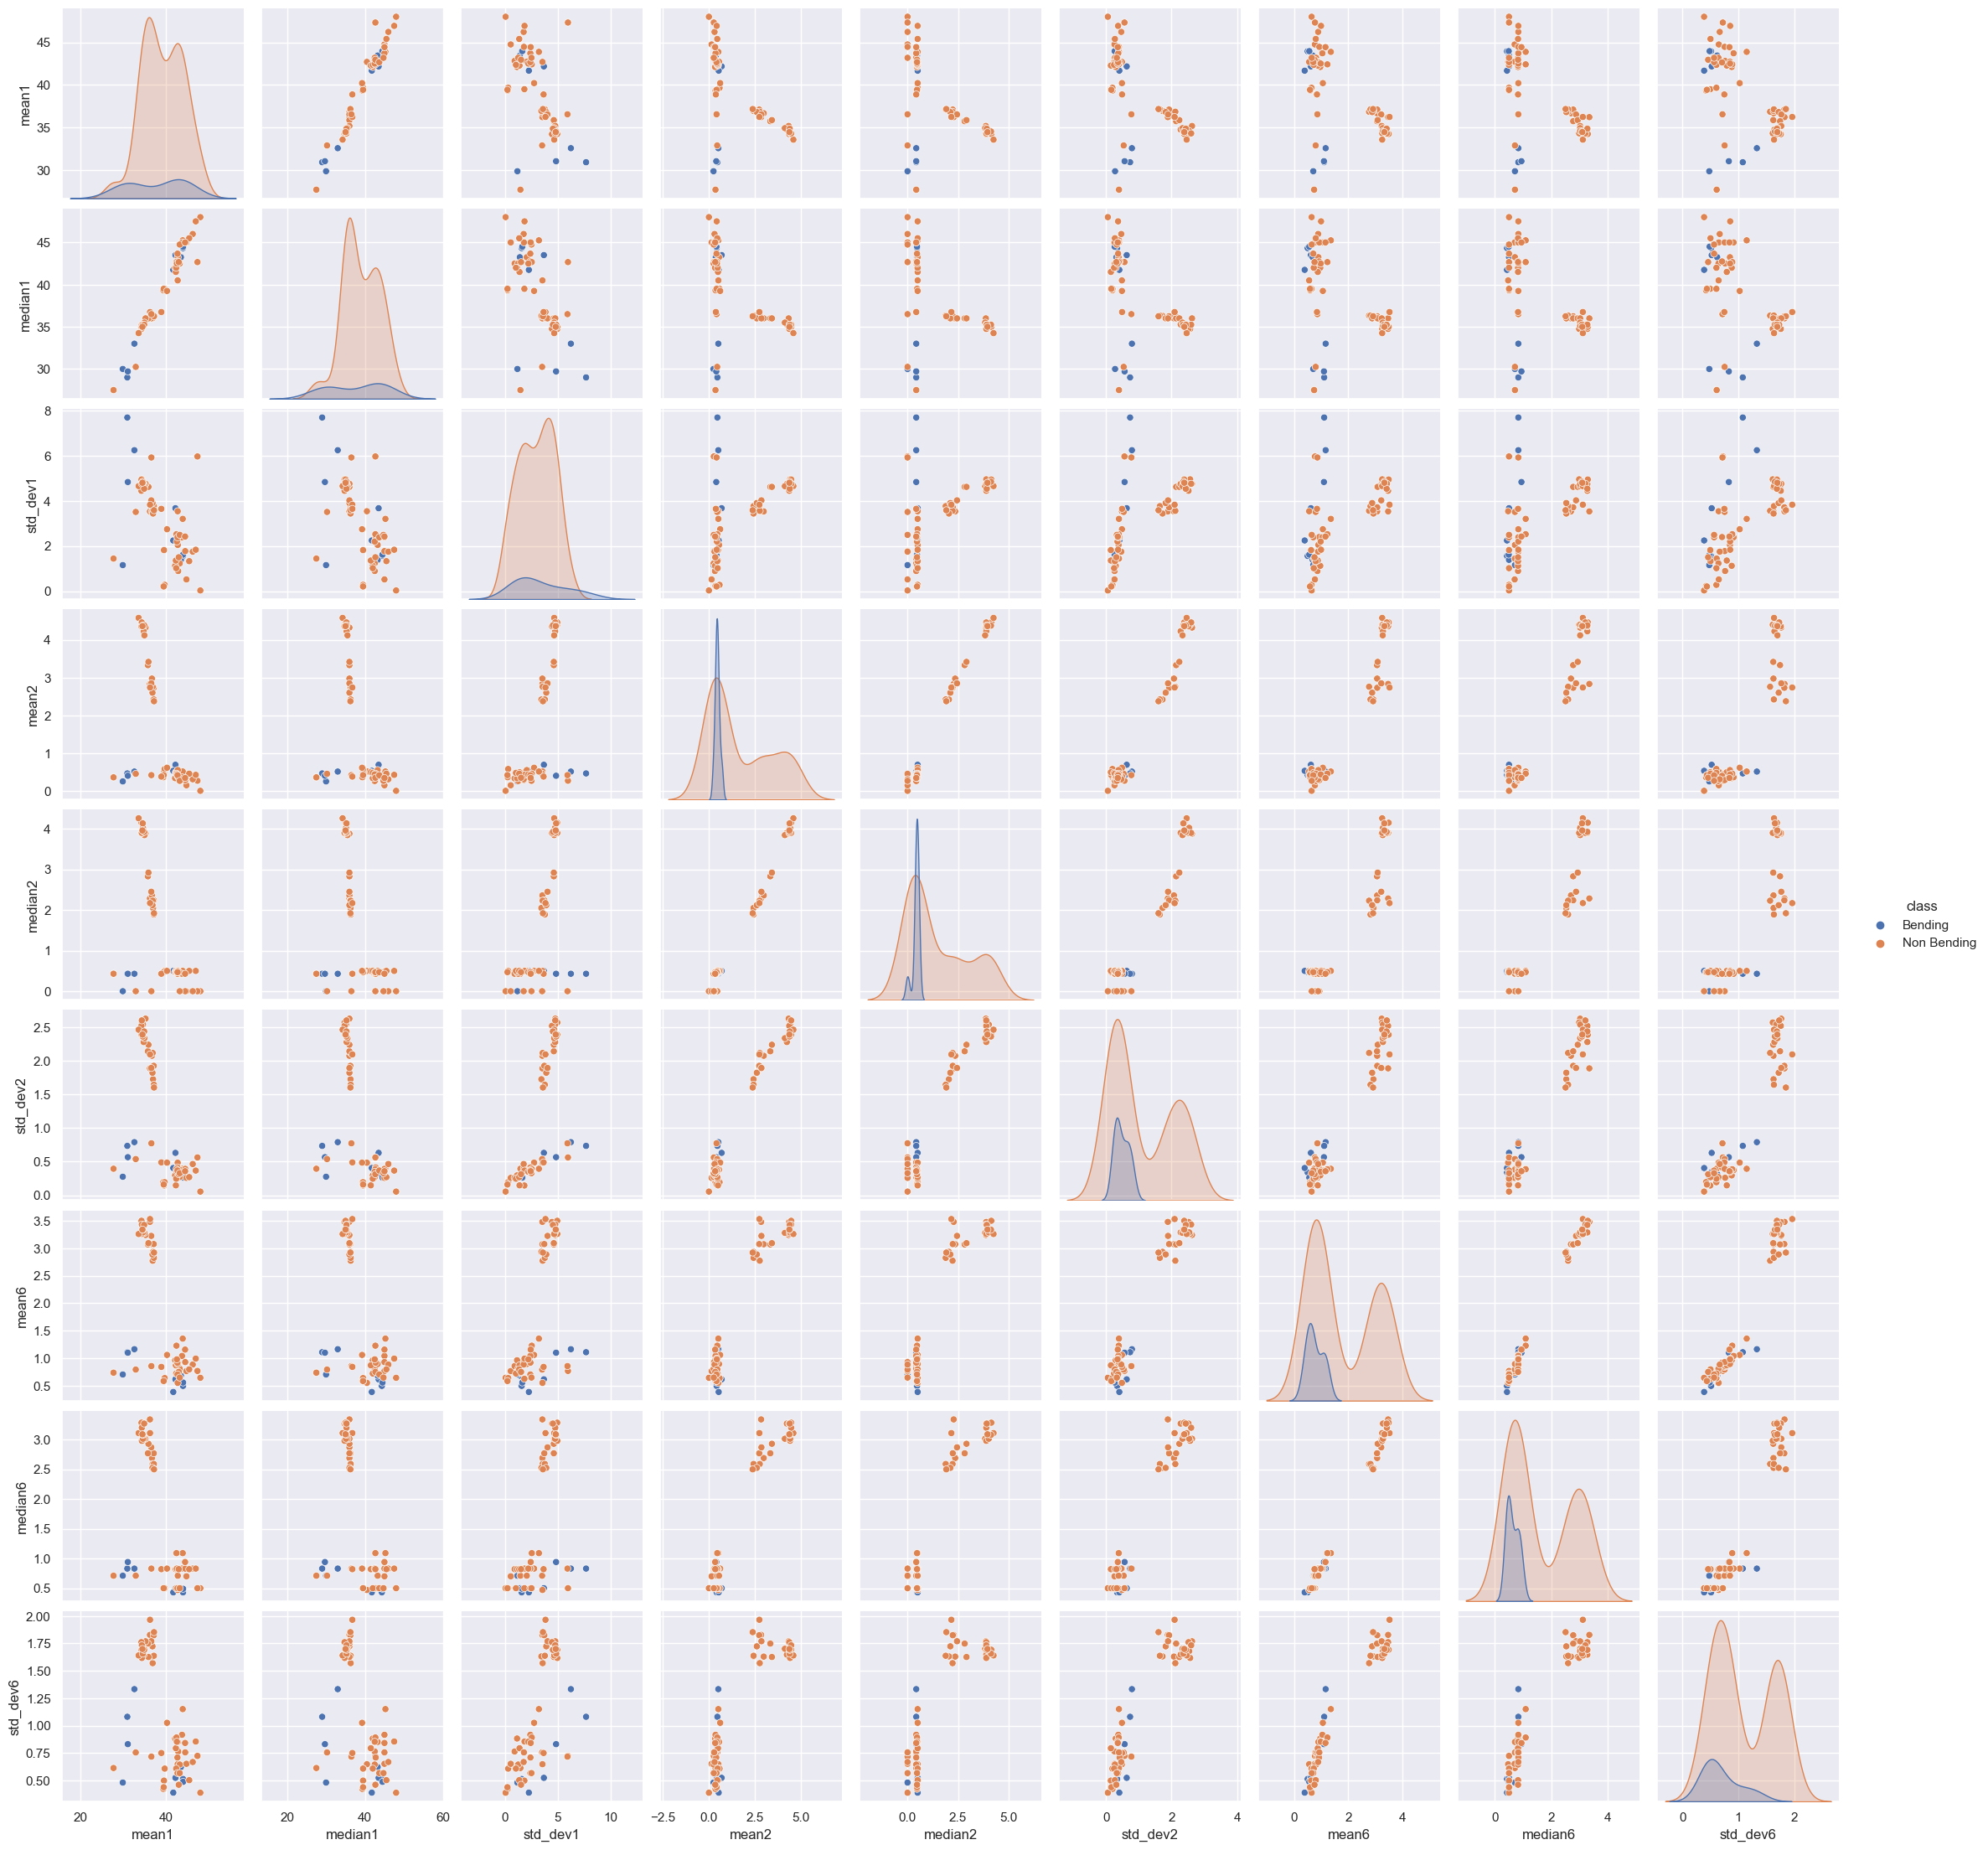

In [27]:
sns.set()
sns.pairplot(data=feature_dataframe, hue = 'class', vars = ['mean1', 'median1', 'std_dev1', 'mean2', 'median2', 'std_dev2', 'mean6', 'median6', 'std_dev6'])
plt.show()

#### ii. Splitted Plots

In [28]:
train_dataset.keys()

dict_keys(['bending1_3', 'bending1_4', 'bending1_5', 'bending1_6', 'bending1_7', 'bending2_3', 'bending2_4', 'bending2_5', 'bending2_6', 'cycling_4', 'cycling_5', 'cycling_6', 'cycling_7', 'cycling_8', 'cycling_9', 'cycling_10', 'cycling_11', 'cycling_12', 'cycling_13', 'cycling_14', 'cycling_15', 'lying_4', 'lying_5', 'lying_6', 'lying_7', 'lying_8', 'lying_9', 'lying_10', 'lying_11', 'lying_12', 'lying_13', 'lying_14', 'lying_15', 'sitting_4', 'sitting_5', 'sitting_6', 'sitting_7', 'sitting_8', 'sitting_9', 'sitting_10', 'sitting_11', 'sitting_12', 'sitting_13', 'sitting_14', 'sitting_15', 'standing_4', 'standing_5', 'standing_6', 'standing_7', 'standing_8', 'standing_9', 'standing_10', 'standing_11', 'standing_12', 'standing_13', 'standing_14', 'standing_15', 'walking_4', 'walking_5', 'walking_6', 'walking_7', 'walking_8', 'walking_9', 'walking_10', 'walking_11', 'walking_12', 'walking_13', 'walking_14', 'walking_15'])

In [29]:
columns = ['avg_rss12', 'var_rss12', 'var_rss23']
statistics_list = []
i = 1

for value in train_dataset:
    dataset = train_dataset[value]
    mean_values1 = []
    median_values1 = []
    std_dev_values1 = []
    mean_values2 = []
    median_values2 = []
    std_dev_values2 = []
    
    for column in columns:
        
        mean_values1.append(dataset[column][:len(df)//2].mean())
        median_values1.append(dataset[column][:len(df)//2].median())
        std_dev_values1.append(dataset[column][:len(df)//2].std())
        mean_values2.append(dataset[column][len(df)//2:].mean())
        median_values2.append(dataset[column][len(df)//2:].median())
        std_dev_values2.append(dataset[column][len(df)//2:].std())
        
        
    temp_stats = pd.DataFrame({
        'Instance': i,
        'mean1_1': mean_values1[0], 'median1_1': median_values1[0], 'std_dev1_1': std_dev_values1[0],
        'mean1_2': mean_values2[0], 'median1_2': median_values2[0], 'std_dev1_2': std_dev_values2[0],
        'mean2_1': mean_values1[1], 'median2_1': median_values1[1], 'std_dev2_1': std_dev_values1[1],
        'mean2_2': mean_values2[1], 'median2_2': median_values2[1], 'std_dev2_2': std_dev_values2[1],
        'mean6_1': mean_values1[2], 'median6_1': median_values1[2], 'std_dev6_1': std_dev_values1[2], 
        'mean6_2': mean_values2[2], 'median6_2': median_values2[2], 'std_dev6_2': std_dev_values2[2],
    }, index=[0])
    
    i = i+1
    statistics_list.append(temp_stats)

statistics_dataframe_2 = pd.concat(statistics_list, axis=0)

In [30]:
statistics_dataframe_2.columns

Index(['Instance', 'mean1_1', 'median1_1', 'std_dev1_1', 'mean1_2',
       'median1_2', 'std_dev1_2', 'mean2_1', 'median2_1', 'std_dev2_1',
       'mean2_2', 'median2_2', 'std_dev2_2', 'mean6_1', 'median6_1',
       'std_dev6_1', 'mean6_2', 'median6_2', 'std_dev6_2'],
      dtype='object')

In [31]:
def determine_class(instance):
    return 'Bending' if instance in [1,2,3,4,5,6,7,8,9] else 'Non Bending'
statistics_dataframe_2['class'] = statistics_dataframe_2['Instance'].apply(determine_class)
statistics_dataframe_2

Instance    mean1_1  median1_1  std_dev1_1    mean1_2  median1_2  \
0          1  44.057167     44.500    1.556971  43.851833     43.500   
0          2  43.278875     45.000    3.473355  41.080750     42.000   
0          3  41.621208     42.330    3.118644  41.734917     41.500   
0          4  44.117042     45.000    1.359836  42.792875     42.670   
0          5  43.486208     43.710    1.281976  44.452042     44.500   
..       ...        ...        ...         ...        ...        ...   
0         65  33.334500     34.000    4.874433  33.839250     34.500   
0         66  34.036750     34.415    4.872880  34.608750     35.500   
0         67  34.033875     35.000    4.758757  35.058583     35.875   
0         68  34.920792     35.330    4.272282  34.825667     35.250   
0         69  34.916792     35.375    4.634209  34.029583     34.500   

    std_dev1_2   mean2_1  median2_1  std_dev2_1   mean2_2  median2_2  \
0     1.557168  0.381042      0.470    0.329540  0.471458      0.500   
0     3.537481  0.673292      0.485    0.634285  0.718792      0.500   
0     0.595920  0.623083      0.500    0.489595  0.448875      0.500   
0     1.058792  0.250042      0.000    0.314099  0.506125      0.500   
0     1.771251  0.378667      0.470    0.284434  0.447583      0.500   
..         ...       ...        ...         ...       ...        ...   
0     4.411903  4.408083      4.195    2.196206  4.745042      4.320   
0     4.621400  4.778292      4.030    2.762730  4.134375      3.740   
0     4.880650  4.574625      4.470    2.391804  4.169292      3.880   
0     4.785599  4.177958      3.865    2.341763  4.583208      4.070   
0     4.923609  4.262333      3.850    2.396878  4.456292      4.195   

    std_dev2_2   mean6_1  median6_1  std_dev6_1   mean6_2  median6_2  \
0     0.342346  0.598250      0.500    0.526656  0.388333      0.000   
0     0.627915  0.640958      0.765    0.554542  0.586083      0.470   
0     0.273050  0.419083      0.430    0.411200  0.347500      0.430   
0     0.260761  0.815417      0.710    0.718016  0.543875      0.500   
0     0.235493  0.524875      0.470    0.486847  0.585750      0.500   
..         ...       ...        ...         ...       ...        ...   
0     2.694219  3.229167      3.110    1.637310  3.290292      3.155   
0     2.387460  3.543708      3.255    1.703098  3.321417      3.155   
0     2.315929  3.244042      2.980    1.619767  3.432208      3.255   
0     2.514203  3.430625      3.270    1.781928  3.418667      3.350   
0     2.381634  3.439917      3.200    1.737420  3.241000      3.060   

    std_dev6_2        class  
0     0.478528      Bending  
0     0.491873      Bending  
0     0.363144      Bending  
0     0.473445      Bending  
0     0.487918      Bending  
..         ...          ...  
0     1.646023  Non Bending  
0     1.758379  Non Bending  
0     1.691050  Non Bending  
0     1.598536  Non Bending  
0     1.657578  Non Bending  

[69 rows x 20 columns]

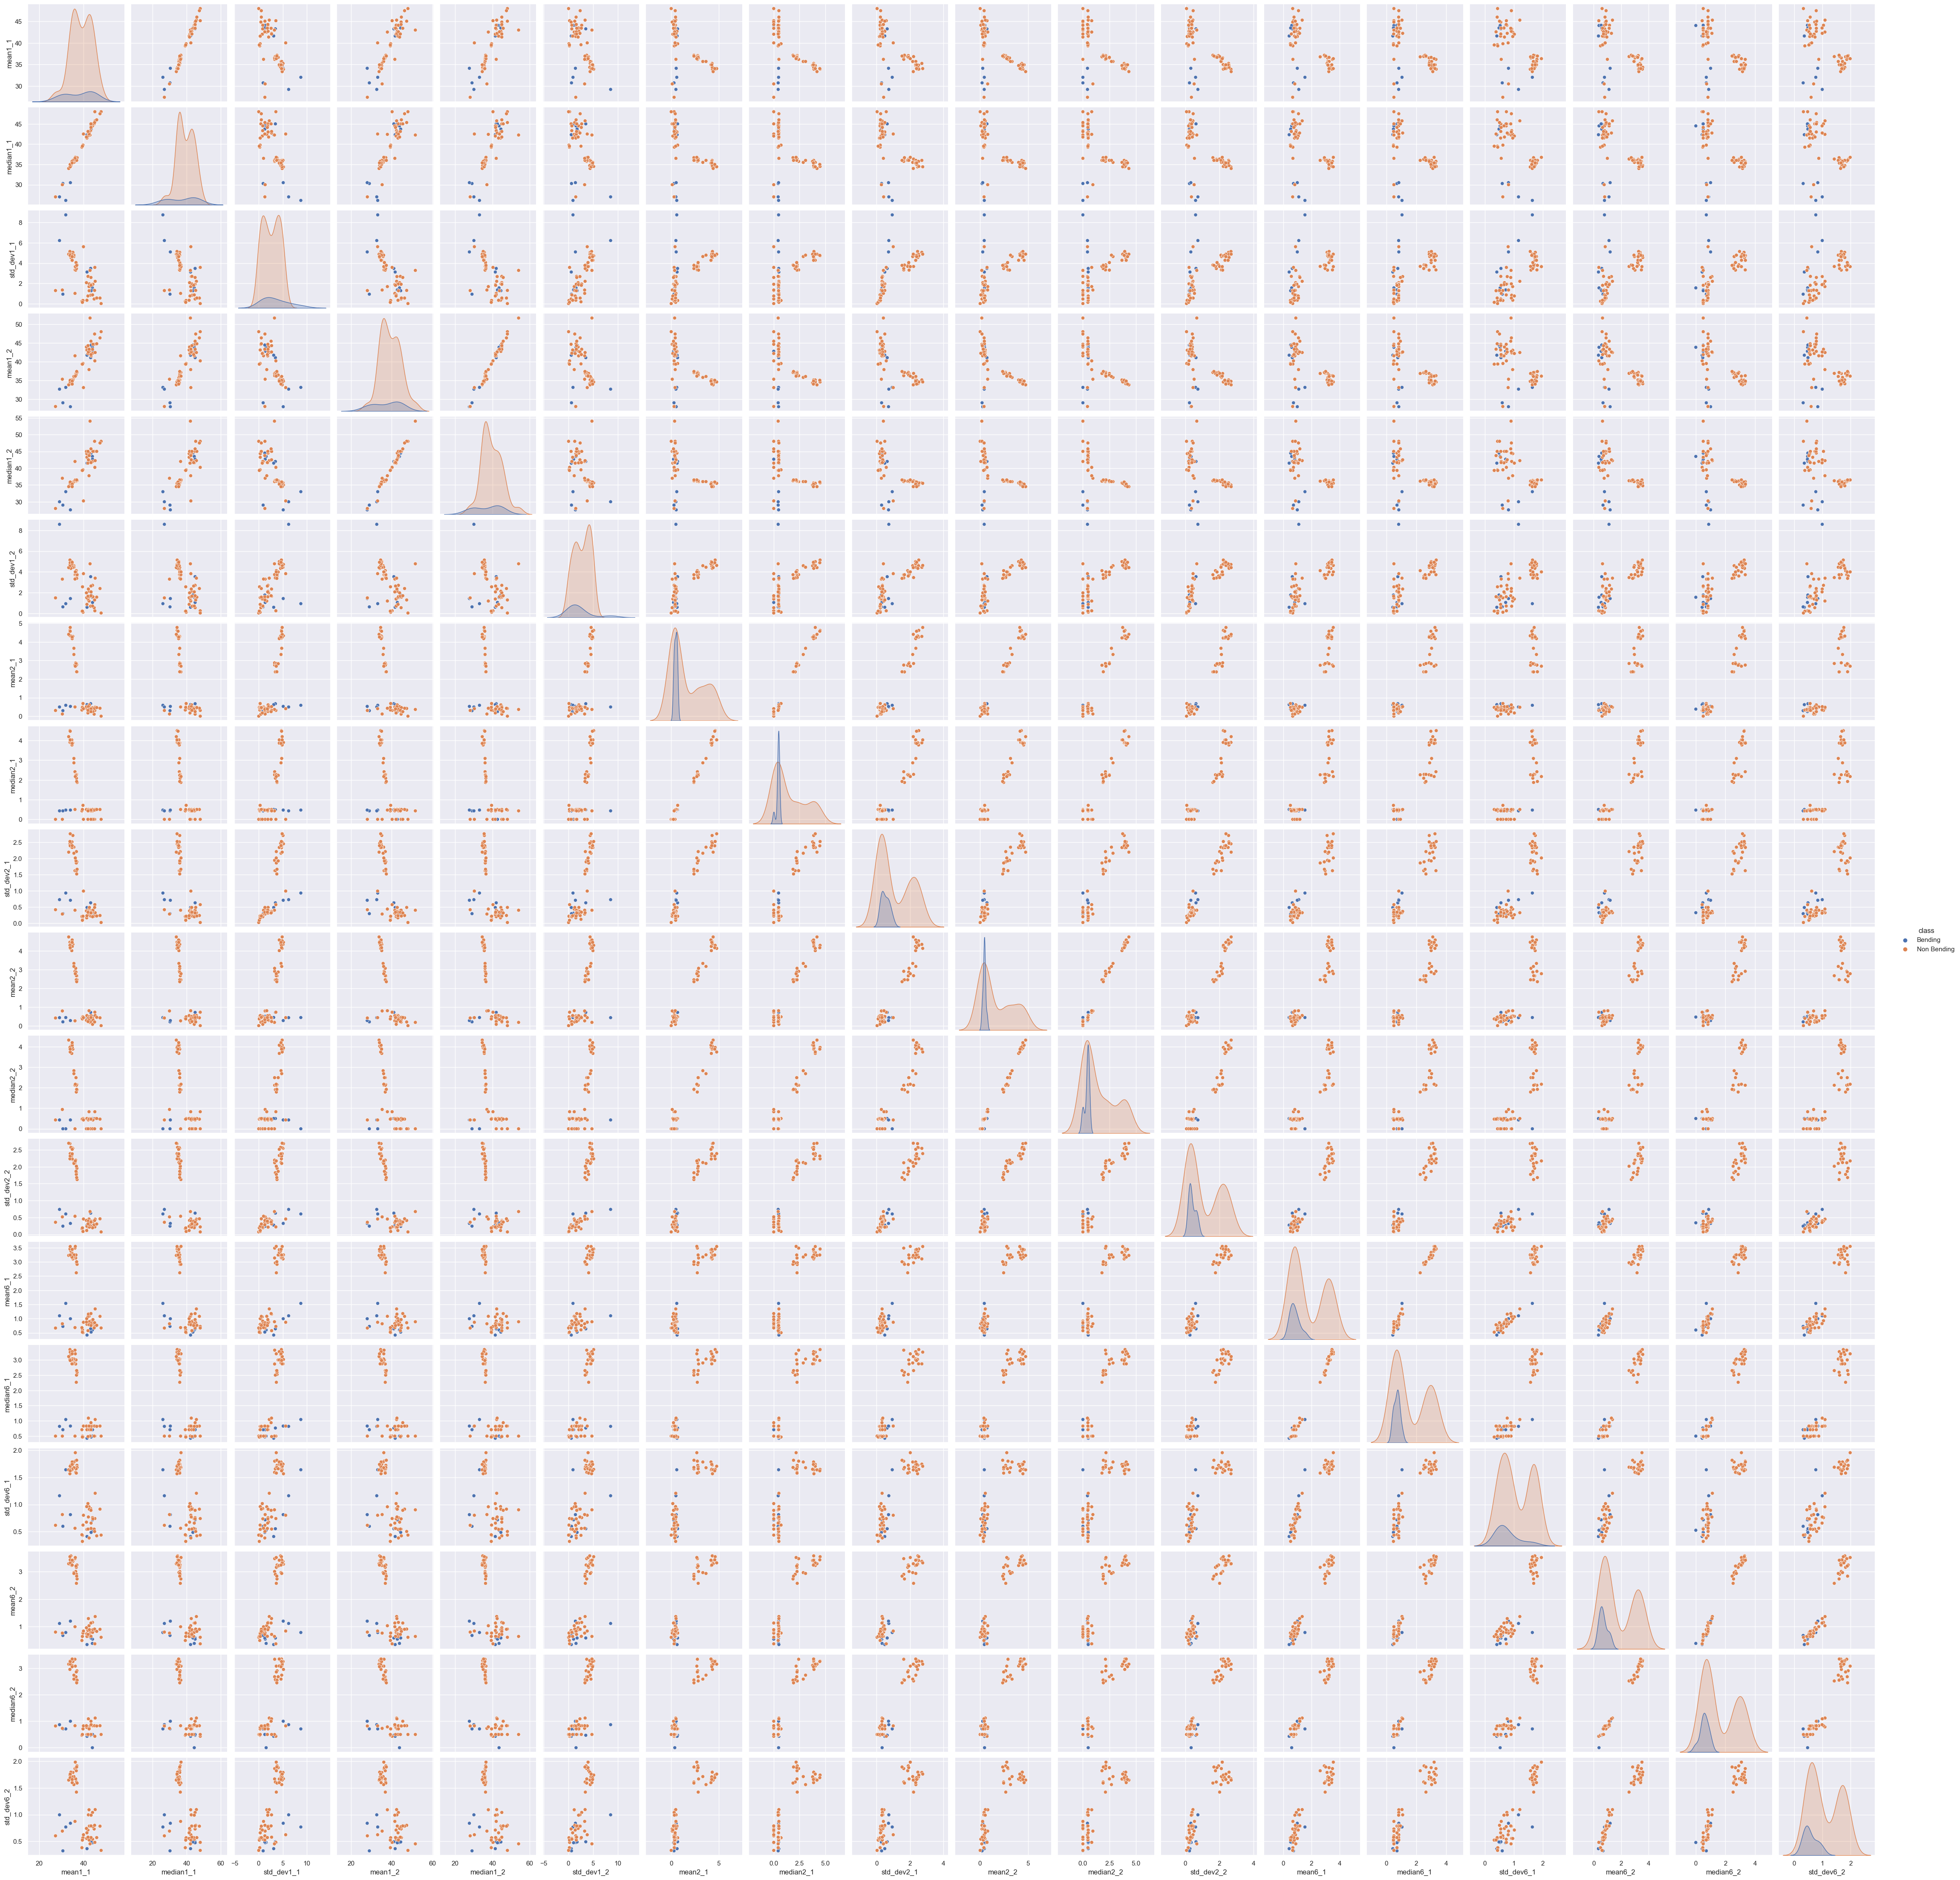

In [32]:
sns.set()
sns.pairplot(data=statistics_dataframe_2, hue = 'class', 
        vars = ['mean1_1', 'median1_1', 'std_dev1_1', 'mean1_2',
       'median1_2', 'std_dev1_2', 'mean2_1', 'median2_1', 'std_dev2_1',
       'mean2_2', 'median2_2', 'std_dev2_2', 'mean6_1', 'median6_1',
       'std_dev6_1', 'mean6_2', 'median6_2', 'std_dev6_2'])
plt.show()

#### iii. Time Series Segments

In [33]:
columns = ['avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']
stats_dictionary = {}

for value in train_dataset:
    dataset = train_dataset[value]
    column_number = 1
    
    value_dict = {}
    
    for column in columns:        
    
        value_dict[f"min{column_number}"] = []
        value_dict[f"max{column_number}"] = []
        value_dict[f"mean{column_number}"] = []
        value_dict[f"median{column_number}"] = []
        value_dict[f"std_dev{column_number}"] = []
        value_dict[f"first_q{column_number}"] = []
        value_dict[f"third_q{column_number}"] = []
        
        for num_parts in range(1, 21):
            mean_temp = []
            median_temp = []
            dev_temp = []
            
            ##
            min_temp = []
            max_temp = []
            first_q_temp = []
            third_q_temp = []
            
            
            rows_per_part = len(dataset) // num_parts
            
            for j in range(num_parts):
                start_idx = j * rows_per_part
                end_idx = (j + 1) * rows_per_part if j < num_parts - 1 else len(dataset)
                
                part_mean = dataset[column][start_idx:end_idx].mean()
                mean_temp.append(part_mean)
                part_median = dataset[column][start_idx:end_idx].median()
                median_temp.append(part_mean)
                part_dev = dataset[column][start_idx:end_idx].std()
                dev_temp.append(part_mean)
                
                
                part_min = dataset[column][start_idx:end_idx].min()
                min_temp.append(part_min)
                part_max = dataset[column][start_idx:end_idx].max()
                max_temp.append(part_max)
                part_1q = dataset[column][start_idx:end_idx].quantile(0.25)
                first_q_temp.append(part_1q)
                part_3q = dataset[column][start_idx:end_idx].quantile(0.75)
                third_q_temp.append(part_3q)
                
                
                #print(mean_temp, '***')
                
            value_dict[f"min{column_number}"].append(min_temp)
            value_dict[f"max{column_number}"].append(max_temp)
            value_dict[f"mean{column_number}"].append(mean_temp)
            value_dict[f"median{column_number}"].append(median_temp)
            value_dict[f"std_dev{column_number}"].append(dev_temp)
            value_dict[f"first_q{column_number}"].append(first_q_temp)
            value_dict[f"third_q{column_number}"].append(third_q_temp)
            
        column_number = column_number + 1
        
    stats_dictionary[value] = value_dict

In [34]:
columns = ['avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']
stats_dictionary_test = {}

for value in test_dataset:
    dataset = test_dataset[value]
    column_number = 1
    
    value_dict = {}
    
    for column in columns:        
    
        value_dict[f"min{column_number}"] = []
        value_dict[f"max{column_number}"] = []
        value_dict[f"mean{column_number}"] = []
        value_dict[f"median{column_number}"] = []
        value_dict[f"std_dev{column_number}"] = []
        value_dict[f"first_q{column_number}"] = []
        value_dict[f"third_q{column_number}"] = []
        
        for num_parts in range(1, 21):
            mean_temp = []
            median_temp = []
            dev_temp = []
            
            ##
            min_temp = []
            max_temp = []
            first_q_temp = []
            third_q_temp = []
            
            
            rows_per_part = len(dataset) // num_parts
            
            for j in range(num_parts):
                start_idx = j * rows_per_part
                end_idx = (j + 1) * rows_per_part if j < num_parts - 1 else len(dataset)
                
                part_mean = dataset[column][start_idx:end_idx].mean()
                mean_temp.append(part_mean)
                part_median = dataset[column][start_idx:end_idx].median()
                median_temp.append(part_mean)
                part_dev = dataset[column][start_idx:end_idx].std()
                dev_temp.append(part_mean)
                
                
                part_min = dataset[column][start_idx:end_idx].min()
                min_temp.append(part_min)
                part_max = dataset[column][start_idx:end_idx].max()
                max_temp.append(part_max)
                part_1q = dataset[column][start_idx:end_idx].quantile(0.25)
                first_q_temp.append(part_1q)
                part_3q = dataset[column][start_idx:end_idx].quantile(0.75)
                third_q_temp.append(part_3q)
                
                
                #print(mean_temp, '***')
                
            value_dict[f"min{column_number}"].append(min_temp)
            value_dict[f"max{column_number}"].append(max_temp)
            value_dict[f"mean{column_number}"].append(mean_temp)
            value_dict[f"median{column_number}"].append(median_temp)
            value_dict[f"std_dev{column_number}"].append(dev_temp)
            value_dict[f"first_q{column_number}"].append(first_q_temp)
            value_dict[f"third_q{column_number}"].append(third_q_temp)
            
        column_number = column_number + 1
        
    stats_dictionary_test[value] = value_dict

In [35]:
stats_dictionary_test.keys()

dict_keys(['bending1_1', 'bending1_2', 'bending2_1', 'bending2_2', 'cycling_1', 'cycling_2', 'cycling_3', 'lying_1', 'lying_2', 'lying_3', 'sitting_1', 'sitting_2', 'sitting_3', 'standing_1', 'standing_2', 'standing_3', 'walking_1', 'walking_2', 'walking_3'])

In [36]:
stats_dictionary_test['bending1_1'].keys()

dict_keys(['min1', 'max1', 'mean1', 'median1', 'std_dev1', 'first_q1', 'third_q1', 'min2', 'max2', 'mean2', 'median2', 'std_dev2', 'first_q2', 'third_q2', 'min3', 'max3', 'mean3', 'median3', 'std_dev3', 'first_q3', 'third_q3', 'min4', 'max4', 'mean4', 'median4', 'std_dev4', 'first_q4', 'third_q4', 'min5', 'max5', 'mean5', 'median5', 'std_dev5', 'first_q5', 'third_q5', 'min6', 'max6', 'mean6', 'median6', 'std_dev6', 'first_q6', 'third_q6'])

In [37]:
stats_dictionary_test['bending1_1']['std_dev3']

[[19.0409375],
 [17.672583333333332, 20.409291666666665],
 [18.3270625, 17.78775, 21.008],
 [17.563916666666668, 17.78125, 19.962749999999996, 20.855833333333333],
 [17.325520833333332,
  19.5703125,
  16.130520833333332,
  20.023541666666667,
  22.154791666666668],
 [17.478125, 19.176, 16.363625, 19.211875, 19.2135, 22.8025],
 [18.454705882352943,
  17.198529411764707,
  19.36764705882353,
  15.202205882352942,
  21.088676470588236,
  19.19,
  22.576805555555556],
 [18.875,
  16.252833333333335,
  20.713833333333334,
  14.848666666666665,
  18.538,
  21.3875,
  19.040333333333333,
  22.67133333333333],
 [19.556603773584907,
  15.36320754716981,
  19.95433962264151,
  18.262830188679246,
  15.130377358490566,
  19.904716981132072,
  20.267169811320752,
  19.78,
  22.92910714285714],
 [20.040000000000003,
  14.611041666666665,
  19.3125,
  19.828125,
  14.571250000000001,
  17.689791666666665,
  21.675416666666663,
  18.371666666666666,
  20.803749999999997,
  23.50583333333333],
 [20.6

In [38]:
stats_dictionary['bending1_3']['min1'][0][0]

35.0

In [39]:
def load_data(N):
    cols = []
    
    for n in range(1, N + 1):
        for i in range(1, 7):
            for metric in ['min', 'max', 'mean', 'median', 'std_dev', 'first_q', 'third_q']:
            #for metric in ['mean', 'median', 'std_dev']:
                cols.append(f'{metric}{i}_{n}')
    
    #print (cols)
    #print(len(cols))
    
    LG_data = [] #pd.DataFrame(columns=cols)
    for position in stats_dictionary.keys():
        new_row = {}
        n = 0
        for col in cols:
            trimmed_col = col[:col.rfind('_')] 
            #print(trimmed_col)
            
            new_row[col] = stats_dictionary[position][trimmed_col][N-1][n]
            if trimmed_col == 'third_q':
            #if trimmed_col == 'std_dev':
                n = n + 1
                
        #LG_data = LG_data.append(new_row, ignore_index=True)
        if position.startswith('bending'):
                new_row['label'] = 1
        else:
            new_row['label'] = 0
        LG_data.append(new_row)
        
    LG_dataframe = pd.DataFrame(LG_data)
    return (LG_dataframe)
    #print(LG_dataframe)


In [92]:
def load_data_test(N):
    cols = []
    
    for n in range(1, N + 1):
        for i in range(1, 7):
            for metric in ['min', 'max', 'mean', 'median', 'std_dev', 'first_q', 'third_q']:
            #for metric in ['mean', 'median', 'std_dev']:
                cols.append(f'{metric}{i}_{n}')
    
    #print (cols)
    #print(len(cols))
    
    LG_data = [] #pd.DataFrame(columns=cols)
    for position in stats_dictionary_test.keys():
        new_row = {}
        n = 0
        for col in cols:
            trimmed_col = col[:col.rfind('_')] 
            #print(trimmed_col)
            
            new_row[col] = stats_dictionary_test[position][trimmed_col][N-1][n]
            if trimmed_col == 'third_q':
            #if trimmed_col == 'std_dev':
                n = n + 1
                
        #LG_data = LG_data.append(new_row, ignore_index=True)
        if position.startswith('bending'):
                new_row['label'] = 1
        else:
            new_row['label'] = 0
        LG_data.append(new_row)
        
    LG_dataframe = pd.DataFrame(LG_data)
    return (LG_dataframe)
    #print(LG_dataframe)


In [40]:
def load_data_multi(N):
    cols = []
    
    for n in range(1, N + 1):
        for i in range(1, 7):
            for metric in ['min', 'max', 'mean', 'median', 'std_dev', 'first_q', 'third_q']:
            #for metric in ['mean', 'median', 'std_dev']:
                cols.append(f'{metric}{i}_{n}')
    
    #print (cols)
    #print(len(cols))
    
    LG_data = [] #pd.DataFrame(columns=cols)
    for position in stats_dictionary.keys():
        new_row = {}
        n = 0
        for col in cols:
            trimmed_col = col[:col.rfind('_')] 
            #print(trimmed_col)
            
            new_row[col] = stats_dictionary[position][trimmed_col][N-1][n]
            if trimmed_col == 'third_q':
            #if trimmed_col == 'std_dev':
                n = n + 1
                
        #LG_data = LG_data.append(new_row, ignore_index=True)
        if position.startswith('bending1'):
            new_row['label'] = 'bending1'
        elif position.startswith('bending2'):
            new_row['label'] = 'bending2'
        elif position.startswith('walking'):
            new_row['label'] = 'walking'
        elif position.startswith('standing'):
            new_row['label'] = 'standing'
        elif position.startswith('sitting'):
            new_row['label'] = 'sitting'
        elif position.startswith('lying'):
            new_row['label'] = 'lying'
        elif position.startswith('cycling'):
            new_row['label'] = 'cycling'
        
        LG_data.append(new_row)
        
    LG_dataframe = pd.DataFrame(LG_data)
    return (LG_dataframe)
    #print(LG_dataframe)

In [116]:
def load_data_multi_test(N):
    cols = []
    
    for n in range(1, N + 1):
        for i in range(1, 7):
            for metric in ['min', 'max', 'mean', 'median', 'std_dev', 'first_q', 'third_q']:
            #for metric in ['mean', 'median', 'std_dev']:
                cols.append(f'{metric}{i}_{n}')
    
    #print (cols)
    #print(len(cols))
    
    LG_data = [] #pd.DataFrame(columns=cols)
    for position in stats_dictionary_test.keys():
        new_row = {}
        n = 0
        for col in cols:
            trimmed_col = col[:col.rfind('_')] 
            #print(trimmed_col)
            
            new_row[col] = stats_dictionary_test[position][trimmed_col][N-1][n]
            if trimmed_col == 'third_q':
            #if trimmed_col == 'std_dev':
                n = n + 1
                
        #LG_data = LG_data.append(new_row, ignore_index=True)
        if position.startswith('bending1'):
            new_row['label'] = 'bending1'
        elif position.startswith('bending2'):
            new_row['label'] = 'bending2'
        elif position.startswith('walking'):
            new_row['label'] = 'walking'
        elif position.startswith('standing'):
            new_row['label'] = 'standing'
        elif position.startswith('sitting'):
            new_row['label'] = 'sitting'
        elif position.startswith('lying'):
            new_row['label'] = 'lying'
        elif position.startswith('cycling'):
            new_row['label'] = 'cycling'
            
        LG_data.append(new_row)
        
    LG_dataframe = pd.DataFrame(LG_data)
    return (LG_dataframe)
    #print(LG_dataframe)


In [102]:
def oversampling(data_set):
    zero_count = data_set.loc[data_set['label'] == 0].shape[0]
    one_count = data_set.loc[data_set['label'] == 1].shape[0]
    minor_count = min(zero_count, one_count)
    major_count = max(zero_count, one_count)
    
    if zero_count > one_count:
        minor_label = 1
        major_label = 0
    else:
        minor_label = 1
        major_label = 0
    
    minor_ds = data_set[data_set['label'] == minor_label]
    major_ds = data_set[data_set['label'] == major_label]
    minor_ds = resample(minor_ds, replace=True, random_state=24, n_samples=max(zero_count, one_count))
    data_set = pd.concat([major_ds, minor_ds])
    return data_set

In [100]:
def logistic_regression(l_val, oversample = False, penalty='none'):
    #features = get_features(l_val)
    train_set = load_data(l_val)
    
    if oversample:
        train_set = oversampling(train_set)
    
    trainX = train_set.iloc[:, :-1]
    trainY = train_set.iloc[:, -1]
    
    validator = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
    model = LogisticRegression(penalty="none", solver="lbfgs", max_iter=1000)
    selector = RFECV(estimator=model, cv=validator, scoring='accuracy')
    #print(selector)
    selector.fit(trainX, trainY)
    return model, selector


In [74]:
results = {
    'pair(l, p)': [],
    'score': []
}

for l in range(1, 21):
    model, selector = logistic_regression(l) 
    nf = selector.n_features_
    score = selector.cv_results_['mean_test_score'].max()
    results['pair(l, p)'].append((l, nf))
    results['score'].append(score)

df = pd.DataFrame(results)
df

pair(l, p)     score
0      (1, 7)  1.000000
1     (2, 16)  0.970330
2      (3, 2)  0.984615
3      (4, 2)  0.984615
4     (5, 49)  0.984615
5     (6, 28)  0.984615
6      (7, 5)  0.984615
7      (8, 4)  0.984615
8      (9, 5)  0.984615
9     (10, 2)  0.970330
10    (11, 4)  0.969231
11    (12, 3)  0.969231
12    (13, 3)  0.969231
13    (14, 3)  0.969231
14    (15, 4)  0.969231
15    (16, 3)  0.969231
16  (17, 404)  0.969231
17  (18, 243)  0.940659
18  (19, 204)  0.940659
19    (20, 3)  0.940659

I have chosen to go ahead with recursive feature elimination with cross validation. Performing the elimination of features before validation would not estimate the test error rate correctly.

#### iv. Confusion Matrix

In [75]:
def get_selected_features(features, selector):
    selected_features = []
    #print("2", selector.support_)
    for i, feature in enumerate(features):
        #print(i, selector.support_[i])
        if selector.support_[i]:
            selected_features.append(feature)
    return selected_features

In [76]:
results1 = {
    'pair(l, p)': [],
    'score': []
}

#lg_features = ['mean1', 'median1', 'std_dev1', 'mean2', 'median2', 'std_dev2', 'mean3', 'median3', 'std_dev3', 'mean4', 'median4', 'std_dev4', 'mean5', 'median5', 'std_dev5', 'mean6', 'median6', 'std_dev6']
lg_features = ['min1', 'max1', 'mean1', 'median1', 'std_dev1', 'first_q1', 'third_q1', 'min2', 'max2', 'mean2', 'median2', 'std_dev2', 'first_q2', 'third_q2', 'min3', 'max3', 'mean3', 'median3', 'std_dev3', 'first_q3', 'third_q3', 'min4', 'max4', 'mean4', 'median4', 'std_dev4', 'first_q4', 'third_q4', 'min5', 'max5', 'mean5', 'median5', 'std_dev5', 'first_q5', 'third_q5', 'min6', 'max6', 'mean6', 'median6', 'std_dev6', 'first_q6', 'third_q6']
classifier, selector = logistic_regression(1)


nf = selector.n_features_
score = selector.cv_results_['mean_test_score'].max()
results1['pair(l, p)'].append((l, nf))
results1['score'].append(score)


selected_features = get_selected_features(lg_features, selector)
selected_features

['std_dev1', 'third_q1', 'max2', 'min5', 'max5', 'median5', 'std_dev5']

In [77]:
train_set = load_data(1)
trainX = train_set.iloc[:, :-1]
trainY = train_set.iloc[:, -1]
filtered_columns = [col for col in trainX.columns if any(col.startswith(item) for item in selected_features)]
trainX_filtered = trainX[filtered_columns]
trainX_filtered.columns = trainX_filtered.columns.str.rsplit('_', n=1).str[0]

print(trainX_filtered)
print(trainY)
display(trainX_filtered)


     std_dev1  third_q1   max2   min5   max5    median5   std_dev5
0   43.954500   45.0000   1.70  29.00  38.50  35.588458  35.588458
1   42.179812   45.0000   3.00  20.00  38.67  33.493917  33.493917
2   41.678063   42.7500   2.83  23.67  37.50  29.857083  29.857083
3   43.454958   45.0000   1.58   8.00  33.50  23.034792  23.034792
4   43.969125   44.6700   1.50  11.33  30.75  22.103750  22.103750
..        ...       ...    ...    ...    ...        ...        ...
64  33.586875   37.0000  14.67   6.33  25.00  15.892146  15.892146
65  34.322750   38.0000  13.47   6.25  23.25  15.550458  15.550458
66  34.546229   37.8125  12.47   7.00  22.75  15.759542  15.759542
67  34.873229   38.2500  14.82   5.50  23.50  15.873896  15.873896
68  34.473188   38.0000  13.86   4.67  23.25  15.704167  15.704167

[69 rows x 7 columns]
0     1
1     1
2     1
3     1
4     1
     ..
64    0
65    0
66    0
67    0
68    0
Name: label, Length: 69, dtype: int64


std_dev1  third_q1   max2   min5   max5    median5   std_dev5
0   43.954500   45.0000   1.70  29.00  38.50  35.588458  35.588458
1   42.179812   45.0000   3.00  20.00  38.67  33.493917  33.493917
2   41.678063   42.7500   2.83  23.67  37.50  29.857083  29.857083
3   43.454958   45.0000   1.58   8.00  33.50  23.034792  23.034792
4   43.969125   44.6700   1.50  11.33  30.75  22.103750  22.103750
..        ...       ...    ...    ...    ...        ...        ...
64  33.586875   37.0000  14.67   6.33  25.00  15.892146  15.892146
65  34.322750   38.0000  13.47   6.25  23.25  15.550458  15.550458
66  34.546229   37.8125  12.47   7.00  22.75  15.759542  15.759542
67  34.873229   38.2500  14.82   5.50  23.50  15.873896  15.873896
68  34.473188   38.0000  13.86   4.67  23.25  15.704167  15.704167

[69 rows x 7 columns]

In [78]:
trainX_filtered = sm.add_constant(trainX_filtered)
model = sm.Logit(trainY.to_numpy(dtype=float), trainX_filtered)
summary = model.fit(method='lbfgs').summary()
print(summary)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D-01    |proj g|=  1.55012D+01

At iterate    1    f=  5.50013D-01    |proj g|=  4.20635D+00

At iterate    2    f=  4.47050D-01    |proj g|=  3.17484D+00

At iterate    3    f=  3.75160D-01    |proj g|=  1.04496D+00

At iterate    4    f=  3.57837D-01    |proj g|=  1.85810D+00

At iterate    5    f=  2.97433D-01    |proj g|=  3.75646D+00

At iterate    6    f=  2.13944D-01    |proj g|=  3.36963D+00

At iterate    7    f=  1.29070D-01    |proj g|=  1.38305D+00

At iterate    8    f=  7.92795D-02    |proj g|=  5.63918D-01

At iterate    9    f=  4.69217D-02    |proj g|=  2.90182D-01

At iterate   10    f=  2.85219D-02    |proj g|=  2.27523D-01

At iterate   11    f=  1.69559D-02    |proj g|=  8.19298D-02

At iterate   12    f=  9.88603D-03    |proj g|=  3.47422D-02

At iterate   13    f=  5.3

 This problem is unconstrained.


#### I tried solving this problem with only the three features I had chosen - mean, median and standard deviation. My result in that case gave me 'nan' p-values for all selected features. This is with using methods - 'newton', ‘bfgs’, lbfgs’, ‘powell’, ‘cg’, ‘ncg’, ‘basinhopping’, ‘minimize’. TA Soumyaroop Nandi and I tried solving this during Office Hours. He recommended I go ahead with using all features in my case. I have attached a screenshot of my output with the three features below.

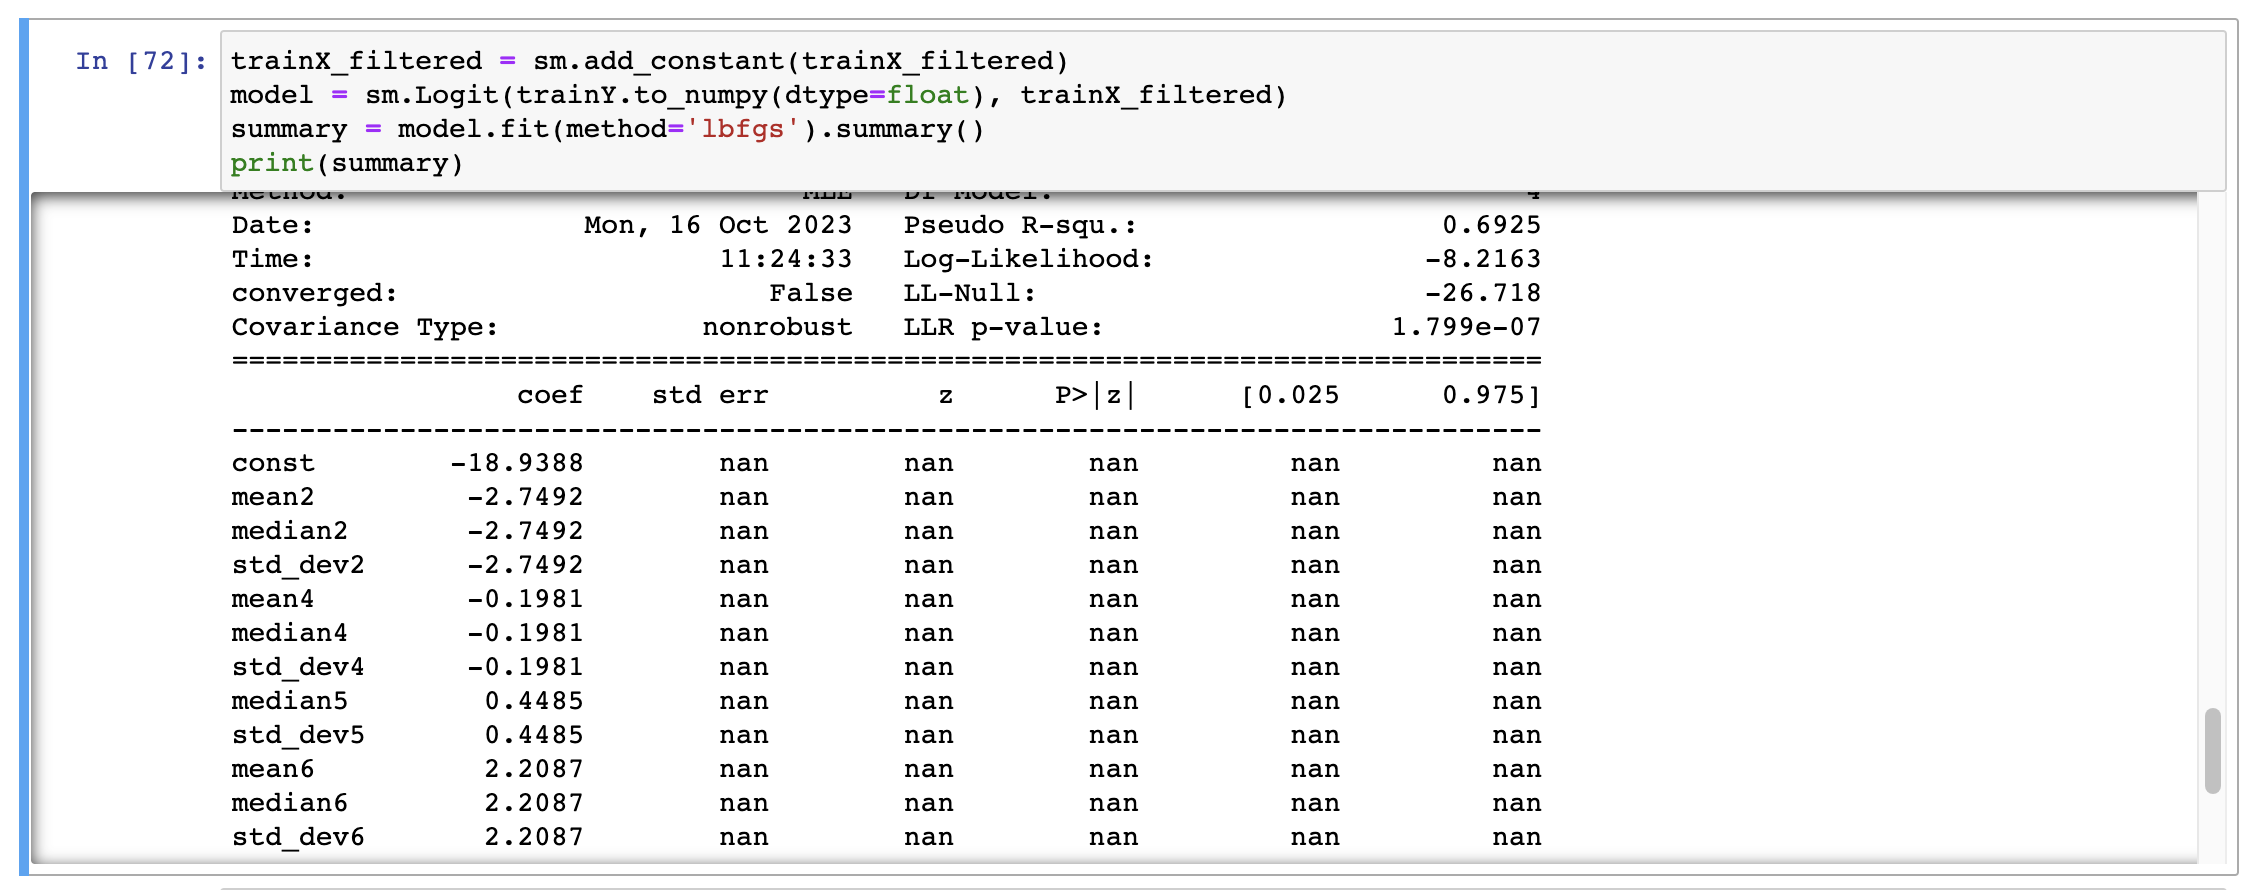

In [85]:
def plot_roc_curve(actualY, predictedY_prob, classifier):
    fig, axes = plt.subplots(figsize=(12, 7))
    axes.set_title("ROC curves")
    for i, claSS in enumerate(classifier.classes_):
        y_predicted = predictedY_prob[:, i]
        fpr, tpr, thresholds = roc_curve(actualY, y_predicted, pos_label=claSS)
        roc_auc = auc(fpr, tpr)
        axes.plot(fpr, tpr, label= f"Class: {claSS}; ROC Curve Area: {round(roc_auc, 4)}")
    axes.plot([0, 1], [0, 1], "--")
    axes.set_xlabel("False Positive Rate")
    axes.set_ylabel("True Positive Rate")
    axes.legend()
    plt.show()

In [86]:
def classification_and_roc_calculation(dataX, dataY, selected_features, isTest=False):
    if not isTest:
        classifier.fit(dataX.loc[:, selected_features], dataY.to_numpy(dtype="int"))
    predictY = classifier.predict(dataX.loc[:, selected_features])
    
    predictY_prob = classifier.predict_proba(dataX.loc[:, selected_features])
    y_true = dataY.to_numpy(dtype=float)
    y_pred = predictY.round()
    cm = confusion_matrix(y_true, y_pred)
    print(cm)

    plot_roc_curve(y_true, predictY_prob, classifier)

[[60  0]
 [ 0  9]]


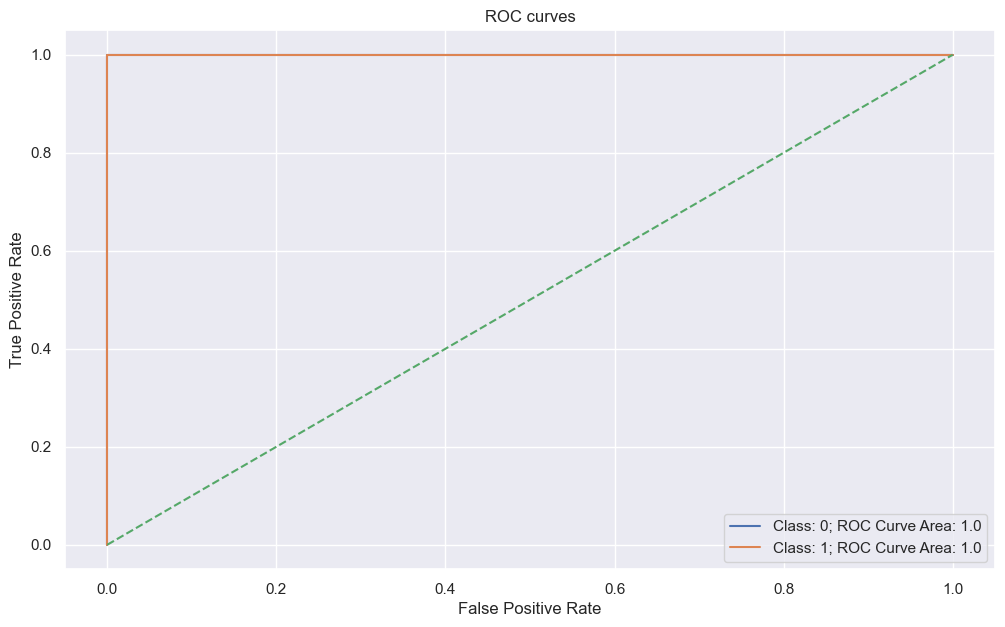

In [87]:
classification_and_roc_calculation(trainX_filtered, trainY, selected_features)

#### v. Test Classifier

In [94]:
test_set = load_data_test(1)
testX = test_set.iloc[:, :-1]
testY = test_set.iloc[:, -1]
filtered_columns = [col for col in testX.columns if any(col.startswith(item) for item in selected_features)]
testX_filtered = testX[filtered_columns]
testX_filtered.columns = testX_filtered.columns.str.rsplit('_', n=1).str[0]
testX_filtered

std_dev1  third_q1   max2   min5   max5    median5   std_dev5
0   40.624792   42.0000   1.30  27.25  38.25  34.311292  34.311292
1   42.812812   43.6700   1.22  27.67  38.50  33.024583  33.024583
2   24.562958   26.5000   6.87  10.67  30.00  23.493042  23.493042
3   27.464604   30.0000   7.76   0.00  33.00  17.617938  17.617938
4   37.177042   40.2500   8.58   7.00  25.50  19.607250  19.607250
5   37.561187   40.2500   9.91  10.50  24.33  19.518896  19.518896
6   37.058708   40.0625  14.17   7.50  24.25  18.125958  18.125958
7   27.716375   29.0000   1.79   0.00  21.00   8.337437   8.337437
8   27.716375   29.0000   1.79   0.00  21.00   8.337437   8.337437
9   48.004167   48.0000   0.43   0.00  12.00   7.624896   7.624896
10  42.363563   43.5000   4.44   1.00  28.00  13.381771  13.381771
11  45.917667   46.5000   4.87   2.00  24.00  18.442792  18.442792
12  45.239667   45.3300   1.00   4.75  26.75  19.330667  19.330667
13  44.334729   46.5000   3.90   0.00  23.00  13.443708  13.443708
14  43.174938   44.5000   2.12   2.00  21.25  14.285500  14.285500
15  42.760562   45.3725   3.34   1.33  21.33  15.550812  15.550812
16  34.227771   37.7500  14.50   6.75  26.00  16.621167  16.621167
17  33.509729   36.7500  13.05   7.25  25.00  16.541375  16.541375
18  34.660583   38.2500  13.44   7.00  24.50  16.251042  16.251042

[[15  0]
 [ 0  4]]


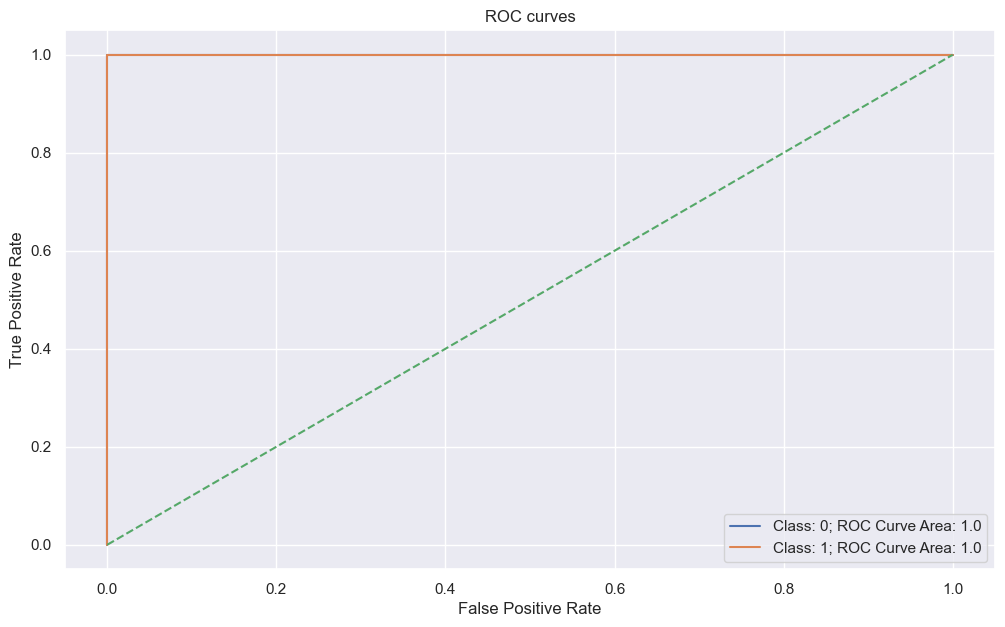

In [95]:
classification_and_roc_calculation(testX_filtered, testY, selected_features, isTest=True)

Accuracy of test set and cross validation is similar.

#### vi. Separation

The summary from statsmodel.api shows that we have Complete Seperation. This might lead to instability in calculating the logistic regression paarmeters.

#### vii. Imbalance

The data is imablanced since we have 9 instances for the bending classes, and 69 instances for the non-bending classes.

In [103]:
result = {
    'pair(l, p)': [],
    'score': []
}
for l_val in range(1, 21):
    model, selector = logistic_regression(l_val, oversample=True)
    nf = selector.n_features_
    score = selector.cv_results_['mean_test_score'].max()
    result['pair(l, p)'].append((l_val, nf))
    result['score'].append(score)

df = pd.DataFrame(result)
df

pair(l, p)     score
0      (1, 6)  1.000000
1      (2, 5)  1.000000
2      (3, 2)  1.000000
3      (4, 2)  0.991667
4     (5, 28)  0.991667
5      (6, 5)  0.991667
6      (7, 4)  0.991667
7      (8, 4)  0.991667
8     (9, 13)  0.991667
9     (10, 9)  0.991667
10   (11, 18)  1.000000
11    (12, 4)  1.000000
12   (13, 26)  0.991667
13   (14, 16)  0.991667
14    (15, 5)  0.983333
15    (16, 5)  0.991667
16  (17, 557)  0.991667
17  (18, 128)  0.991667
18   (19, 14)  0.983333
19   (20, 11)  0.975000

In [106]:
l_value = 1
fold_count = 5
features = ['min1', 'max1', 'mean1', 'median1', 'std_dev1', 'first_q1', 'third_q1', 'min2', 'max2', 'mean2', 'median2', 'std_dev2', 'first_q2', 'third_q2', 'min3', 'max3', 'mean3', 'median3', 'std_dev3', 'first_q3', 'third_q3', 'min4', 'max4', 'mean4', 'median4', 'std_dev4', 'first_q4', 'third_q4', 'min5', 'max5', 'mean5', 'median5', 'std_dev5', 'first_q5', 'third_q5', 'min6', 'max6', 'mean6', 'median6', 'std_dev6', 'first_q6', 'third_q6']
classifier, selector = logistic_regression(l_value, oversample=True)
selected_features = get_selected_features(features, selector)
selected_features

['std_dev1', 'third_q1', 'max2', 'min5', 'max5', 'std_dev5']

std_dev1  third_q1   max2   min5   max5   std_dev5  label
0   43.954500   45.0000   1.70  29.00  38.50  35.588458      1
1   42.179812   45.0000   3.00  20.00  38.67  33.493917      1
2   41.678063   42.7500   2.83  23.67  37.50  29.857083      1
3   43.454958   45.0000   1.58   8.00  33.50  23.034792      1
4   43.969125   44.6700   1.50  11.33  30.75  22.103750      1
..        ...       ...    ...    ...    ...        ...    ...
64  33.586875   37.0000  14.67   6.33  25.00  15.892146      0
65  34.322750   38.0000  13.47   6.25  23.25  15.550458      0
66  34.546229   37.8125  12.47   7.00  22.75  15.759542      0
67  34.873229   38.2500  14.82   5.50  23.50  15.873896      0
68  34.473188   38.0000  13.86   4.67  23.25  15.704167      0

[69 rows x 7 columns]

[[60  0]
 [ 0 60]]


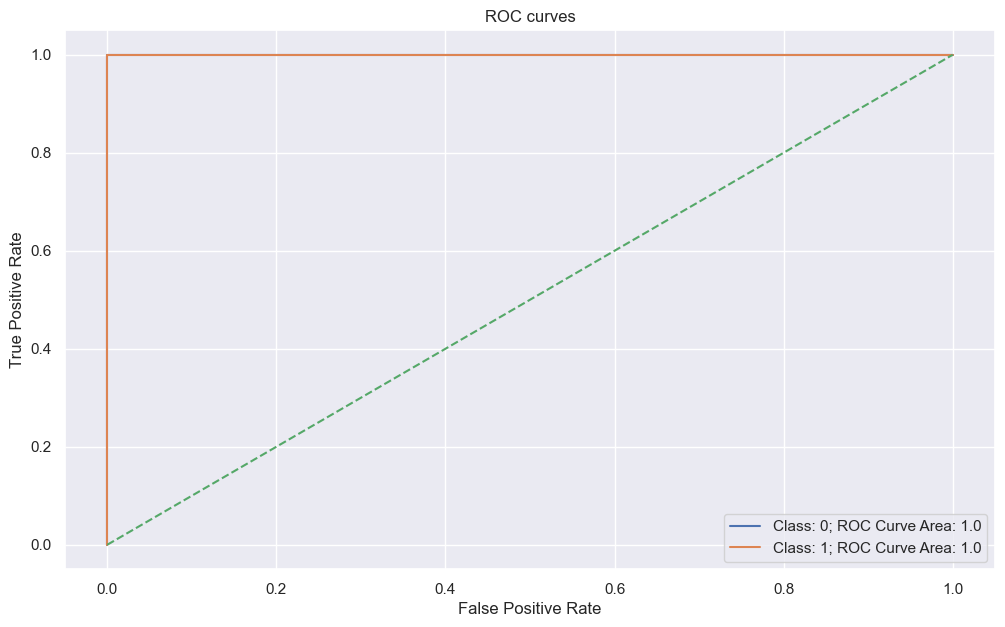

In [108]:
train_set = load_data(1)
filtered_columns = [col for col in train_set.columns if any(col.startswith(item) for item in selected_features)]
filtered_columns.append('label')
train_set_filtered = train_set[filtered_columns]
train_set_filtered.columns = train_set_filtered.columns.str.rsplit('_', n=1).str[0]
display(train_set_filtered)

train_set_filtered = oversampling(train_set_filtered)
trainX = train_set_filtered.iloc[:, :-1]
trainY = train_set_filtered.iloc[:, -1]
classification_and_roc_calculation(trainX, trainY, selected_features)

[[15  0]
 [ 0  4]]


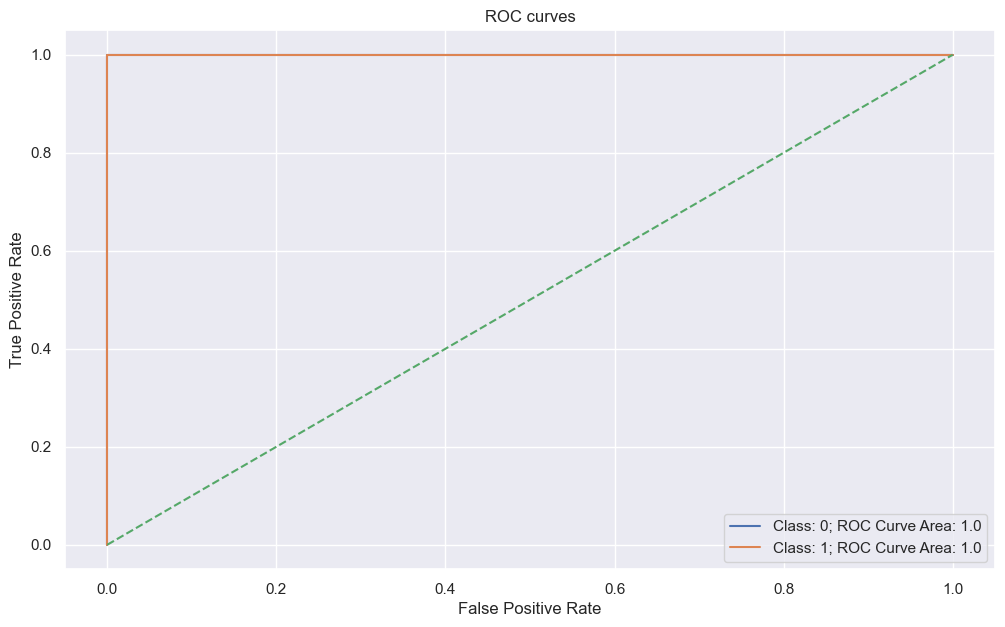

In [109]:
test_set = load_data_test(1)
filtered_columns = [col for col in train_set.columns if any(col.startswith(item) for item in selected_features)]
filtered_columns.append('label')
test_set_filtered = test_set[filtered_columns]
test_set_filtered.columns = test_set_filtered.columns.str.rsplit('_', n=1).str[0]
testX = test_set_filtered.iloc[:, :-1]
testY = test_set_filtered.iloc[:, -1]
classification_and_roc_calculation(testX, testY, selected_features)

### (b) Binary Classification Using L1-penalized logistic regression

#### i. Time Series Segments

In [110]:
def logistic_regression_l1(l_val):
    train_set = load_data(l_val)
    test_set = load_data_test(l_val)
    
    trainX = train_set.iloc[:, :-1]
    trainY = train_set.iloc[:, -1]
    testX = test_set.iloc[:, :-1]
    testY = test_set.iloc[:, -1]
    model = LogisticRegressionCV(cv=5, penalty='l1', random_state=69, scoring='accuracy', solver='liblinear')
    model.fit(trainX, trainY)
    
    train_score = model.score(trainX, trainY)
    test_score = model.score(testX, testY)
    print(f'Value of L: {l_val}')
    print("train_score: ", train_score, "test_score: ", test_score)
    print("train_error: ", (1- train_score), "test_error: ", (1 - test_score))
    global best_accuracy
    global best_l
    if test_score > best_accuracy:
        best_accuracy = test_score
        best_l = l_val

    if l_val == 20:
        print(f'The best accuracy is {best_accuracy} with L value: {best_l}')

In [111]:
best_accuracy = 0
best_l = 1
for l in range(1, 21):
    logistic_regression_l1(l )

Value of L: 1
train_score:  1.0 test_score:  1.0
train_error:  0.0 test_error:  0.0
Value of L: 2
train_score:  1.0 test_score:  1.0
train_error:  0.0 test_error:  0.0
Value of L: 3
train_score:  1.0 test_score:  1.0
train_error:  0.0 test_error:  0.0
Value of L: 4
train_score:  1.0 test_score:  0.9473684210526315
train_error:  0.0 test_error:  0.052631578947368474
Value of L: 5
train_score:  1.0 test_score:  0.9473684210526315
train_error:  0.0 test_error:  0.052631578947368474
Value of L: 6
train_score:  1.0 test_score:  0.9473684210526315
train_error:  0.0 test_error:  0.052631578947368474
Value of L: 7
train_score:  1.0 test_score:  0.9473684210526315
train_error:  0.0 test_error:  0.052631578947368474
Value of L: 8
train_score:  1.0 test_score:  0.9473684210526315
train_error:  0.0 test_error:  0.052631578947368474
Value of L: 9
train_score:  1.0 test_score:  0.9473684210526315
train_error:  0.0 test_error:  0.052631578947368474
Value of L: 10
train_score:  1.0 test_score:  0.9473

Confusion matrix for test data:
[[15  0]
 [ 0  4]]
ROC Curve for Train Data


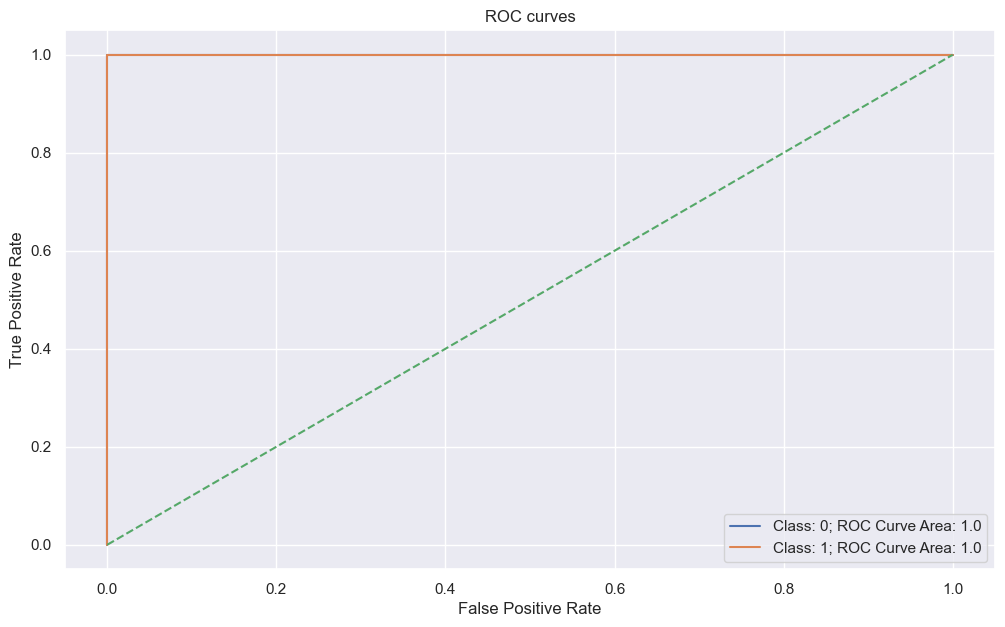

ROC Curve for Test Data


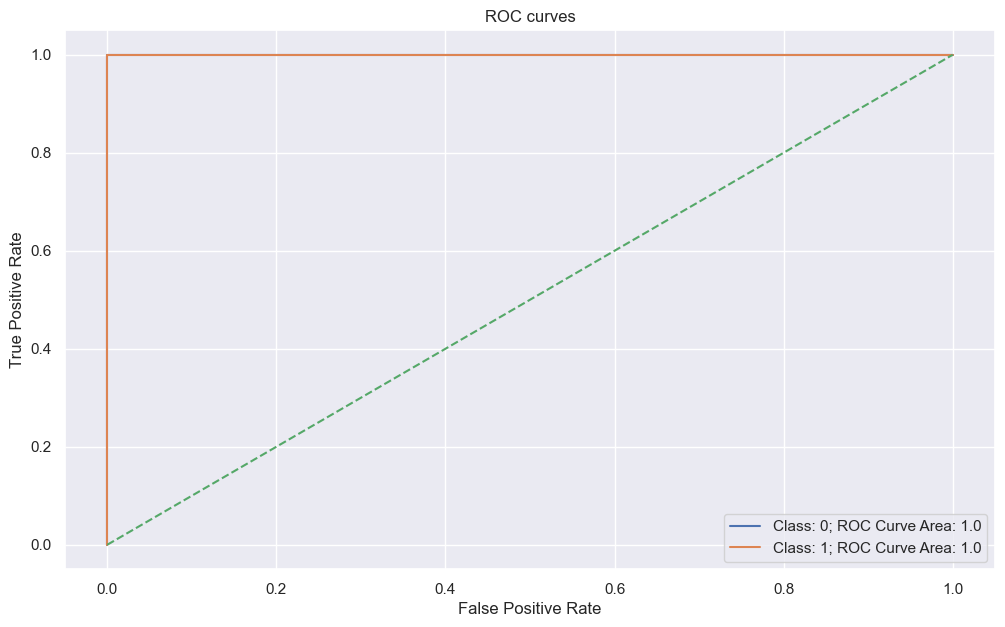

In [112]:
train_set = load_data(best_l)
test_set = load_data_test(best_l)

trainX = train_set.iloc[:, :-1]
trainY = train_set.iloc[:, -1]
testX = test_set.iloc[:, :-1]
testY = test_set.iloc[:, -1]

model = LogisticRegressionCV(cv=5, penalty='l1', random_state=69, scoring='accuracy', solver='liblinear')
model.fit(trainX, trainY)

train_prob = model.predict_proba(trainX)
test_prob = model.predict_proba(testX)

predictY = model.predict(testX)
cm = confusion_matrix(testY, predictY)
print(f"Confusion matrix for test data:\n{cm}")

print("ROC Curve for Train Data")
plot_roc_curve(trainY, train_prob, model)

print("ROC Curve for Test Data")
plot_roc_curve(testY, test_prob, model)

#### ii. Comparison

L1-penalized regression has a better accuracy of almost 100% on test data. I find the L1-penalized regression to be easier to implement since feature selection is automated.

### (c) Multi-class Classification (The Realistic Case)

#### i. Time Series Segments

In [117]:
def multi_logistic_regression(l_val):
    train_set = load_data_multi(l_val)
    test_set = load_data_multi_test(l_val)
    
    trainY = train_set.iloc[:, -1]
    testX = test_set.iloc[:, :-1]
    testY = test_set.iloc[:, -1]
    
    model = LogisticRegressionCV(cv=5, multi_class='multinomial', penalty='l1', random_state=42, solver='saga')
    model.fit(trainX, trainY)
    
    train_score = model.score(trainX, trainY)
    test_score = model.score(testX, testY)
    print(f'Value of L: {l_val}')
    print("train_score: ", train_score, "test_score: ", test_score)
    print("train_error: ", (1- train_score), "test_error: ", (1 - test_score))
    global best_accuracy
    global best_l
    if test_score > best_accuracy:
        best_accuracy = test_score
        best_l = l_val

    if l_val == 20:
        print(f'The best accuracy is {best_accuracy} with L value: {best_l}')

In [118]:
best_accuracy = 0
best_l = 1
for l in range(1, 21):
    multi_logistic_regression(l)

Value of L: 1
train_score:  0.9710144927536232 test_score:  0.8947368421052632
train_error:  0.02898550724637683 test_error:  0.10526315789473684
Value of L: 2
train_score:  1.0 test_score:  0.8947368421052632
train_error:  0.0 test_error:  0.10526315789473684
Value of L: 3
train_score:  0.9565217391304348 test_score:  0.8421052631578947
train_error:  0.04347826086956519 test_error:  0.1578947368421053
Value of L: 4
train_score:  0.9565217391304348 test_score:  0.8421052631578947
train_error:  0.04347826086956519 test_error:  0.1578947368421053
Value of L: 5
train_score:  0.927536231884058 test_score:  0.7894736842105263
train_error:  0.07246376811594202 test_error:  0.21052631578947367
Value of L: 6
train_score:  0.9420289855072463 test_score:  0.7894736842105263
train_error:  0.05797101449275366 test_error:  0.21052631578947367
Value of L: 7
train_score:  0.9565217391304348 test_score:  0.7368421052631579
train_error:  0.04347826086956519 test_error:  0.26315789473684215
Value of L: 

Confusion matrix for test data:
[[2 0 0 0 0 0 0]
 [0 1 1 0 0 0 0]
 [0 0 3 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 3 0 0]
 [0 0 0 1 0 2 0]
 [0 0 0 0 0 0 3]]
ROC Curve for Train Data


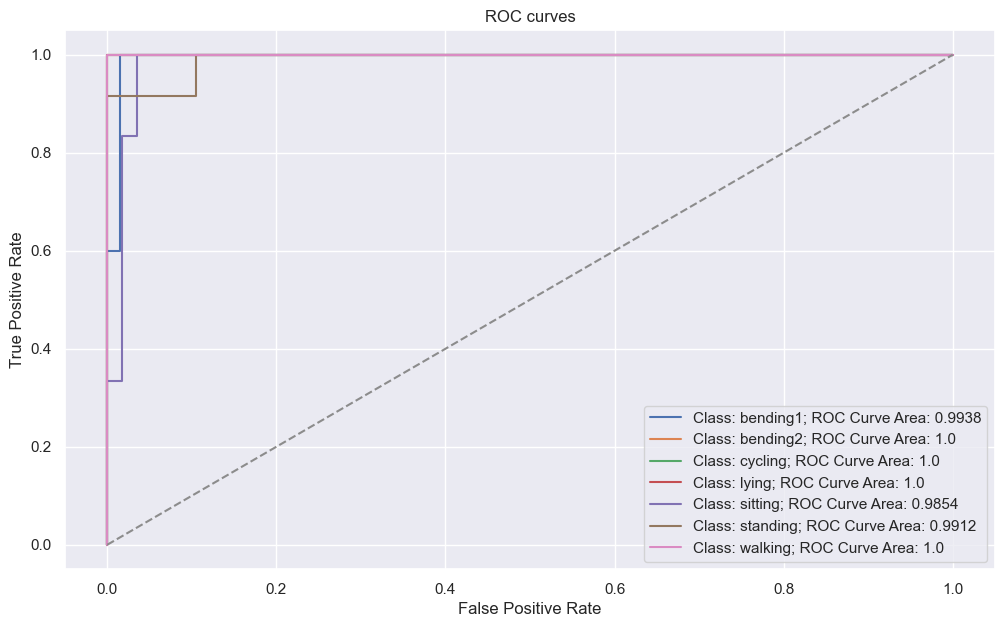

ROC Curve for Test Data


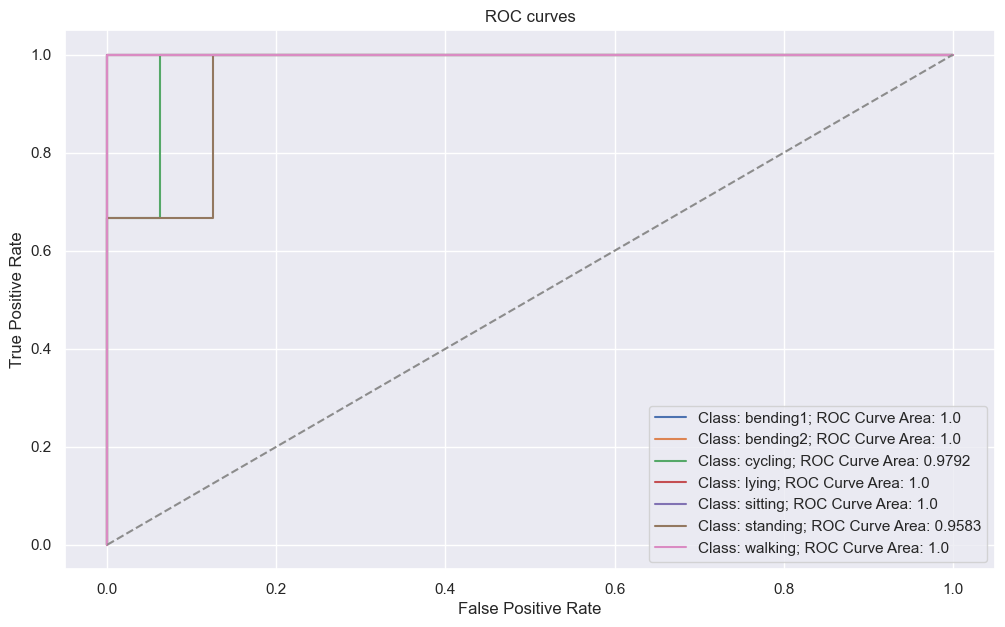

In [119]:
train_set = load_data_multi(best_l)
test_set = load_data_multi_test(best_l)

trainX = train_set.iloc[:, :-1]
trainY = train_set.iloc[:, -1]
testX = test_set.iloc[:, :-1]
testY = test_set.iloc[:, -1]

model = LogisticRegression(multi_class='multinomial', penalty='l1', solver='saga',random_state=42)
model.fit(trainX, trainY)

train_prob = model.predict_proba(trainX)
test_prob = model.predict_proba(testX)

predictY = model.predict(testX)
cm = confusion_matrix(testY, predictY)
print(f"Confusion matrix for test data:\n{cm}")

print("ROC Curve for Train Data")
plot_roc_curve(trainY, train_prob, model)

print("ROC Curve for Test Data")
plot_roc_curve(testY, test_prob, model)

#### ii. Naive Bayes

In [120]:
def multi_logistic_regression_naive(l_val):
    train_set = load_data_multi(l_val)
    test_set = load_data_multi_test(l_val)
    
    trainX = train_set.iloc[:, :-1]
    trainY = train_set.iloc[:, -1]
    testX = test_set.iloc[:, :-1]
    testY = test_set.iloc[:, -1]
    
    model = GaussianNB()
    model.fit(trainX, trainY)
    
    train_score = model.score(trainX, trainY)
    test_score = model.score(testX, testY)
    print(f'Value of L: {l_val}')
    print("train_score: ", train_score, "test_score: ", test_score)
    print("train_error: ", (1- train_score), "test_error: ", (1 - test_score))
    global best_accuracy
    global best_l
    if test_score > best_accuracy:
        best_accuracy = test_score
        best_l = l_val

    if l_val == 20:
        print(f'The best accuracy is {best_accuracy} with L value: {best_l}')

In [121]:
best_accuracy = 0
best_l = 1
for l in range(1, 21):
    multi_logistic_regression_naive(l)

Value of L: 1
train_score:  0.9565217391304348 test_score:  1.0
train_error:  0.04347826086956519 test_error:  0.0
Value of L: 2
train_score:  0.9420289855072463 test_score:  0.8421052631578947
train_error:  0.05797101449275366 test_error:  0.1578947368421053
Value of L: 3
train_score:  0.9565217391304348 test_score:  0.7894736842105263
train_error:  0.04347826086956519 test_error:  0.21052631578947367
Value of L: 4
train_score:  0.9420289855072463 test_score:  0.8947368421052632
train_error:  0.05797101449275366 test_error:  0.10526315789473684
Value of L: 5
train_score:  0.9420289855072463 test_score:  0.7894736842105263
train_error:  0.05797101449275366 test_error:  0.21052631578947367
Value of L: 6
train_score:  0.8985507246376812 test_score:  0.7368421052631579
train_error:  0.10144927536231885 test_error:  0.26315789473684215
Value of L: 7
train_score:  0.9130434782608695 test_score:  0.7368421052631579
train_error:  0.08695652173913049 test_error:  0.26315789473684215
Value of L

Confusion matrix for test data:
[[2 0 0 0 0 0 0]
 [0 1 1 0 0 0 0]
 [0 0 3 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 3 0 0]
 [0 0 0 1 0 2 0]
 [0 0 0 0 0 0 3]]
ROC Curve for Train Data


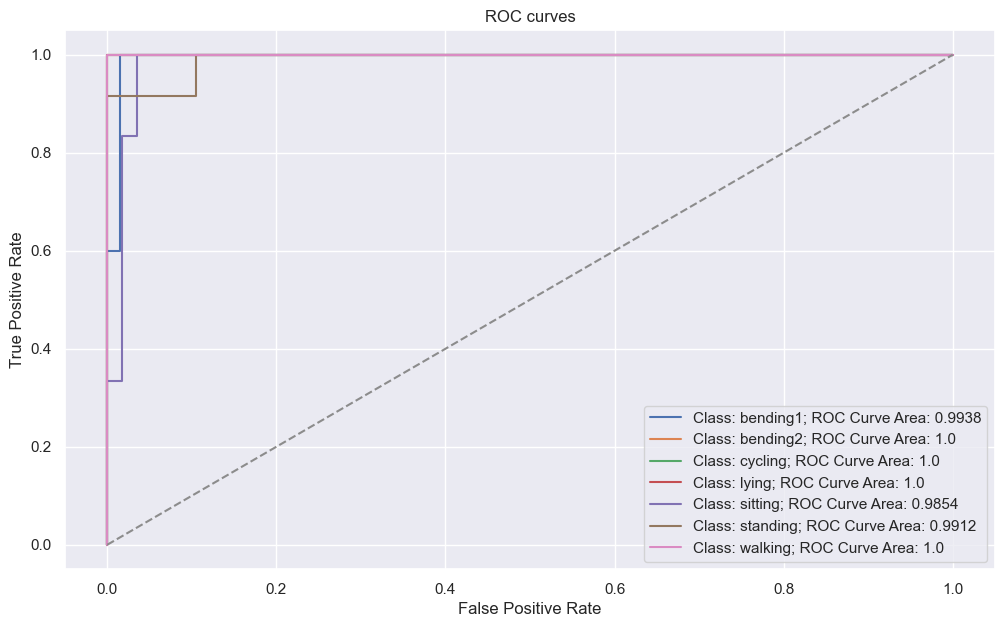

ROC Curve for Test Data


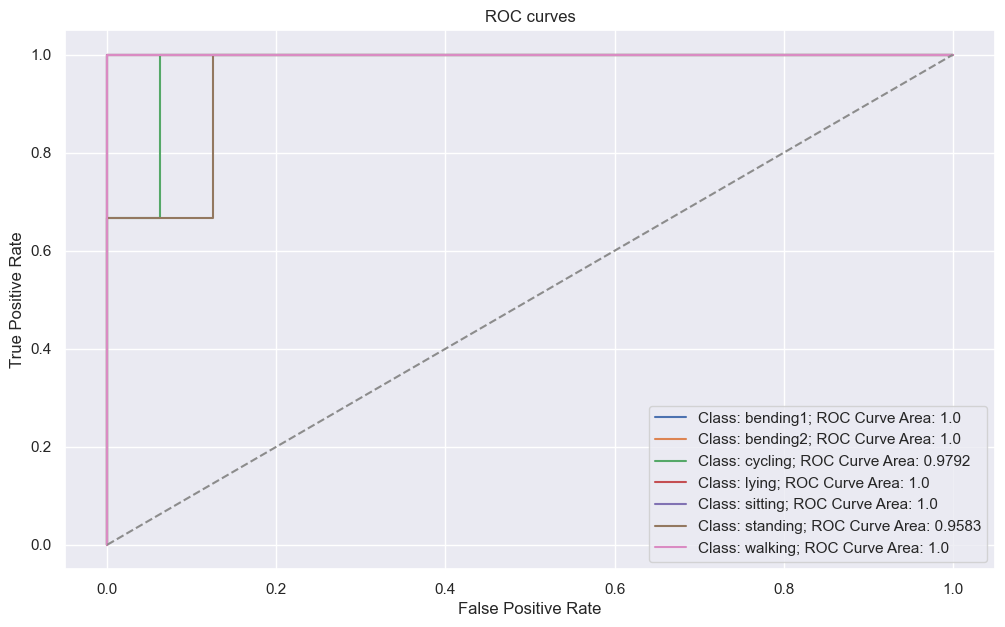

In [122]:
train_set = load_data_multi(best_l)
test_set = load_data_multi_test(best_l)

trainX = train_set.iloc[:, :-1]
trainY = train_set.iloc[:, -1]
testX = test_set.iloc[:, :-1]
testY = test_set.iloc[:, -1]

model = LogisticRegression(multi_class='multinomial', penalty='l1', solver='saga',random_state=42)
model.fit(trainX, trainY)

train_prob = model.predict_proba(trainX)
test_prob = model.predict_proba(testX)

predictY = model.predict(testX)
cm = confusion_matrix(testY, predictY)
print(f"Confusion matrix for test data:\n{cm}")

print("ROC Curve for Train Data")
plot_roc_curve(trainY, train_prob, model)

print("ROC Curve for Test Data")
plot_roc_curve(testY, test_prob, model)

#### ii. Comparison

The Logistic Regression methoid fares better based on the area under the ROC Curve for the test datasets.

## 3. ISLR 4.8.3

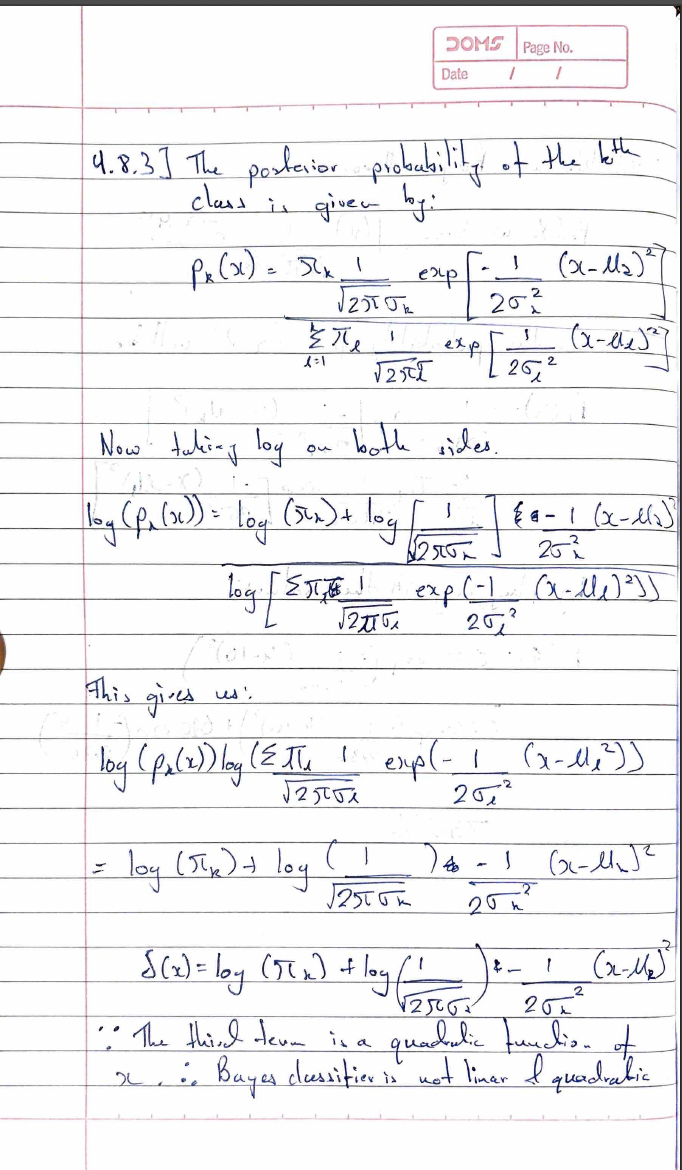

## 4. ISLR 4.8.7

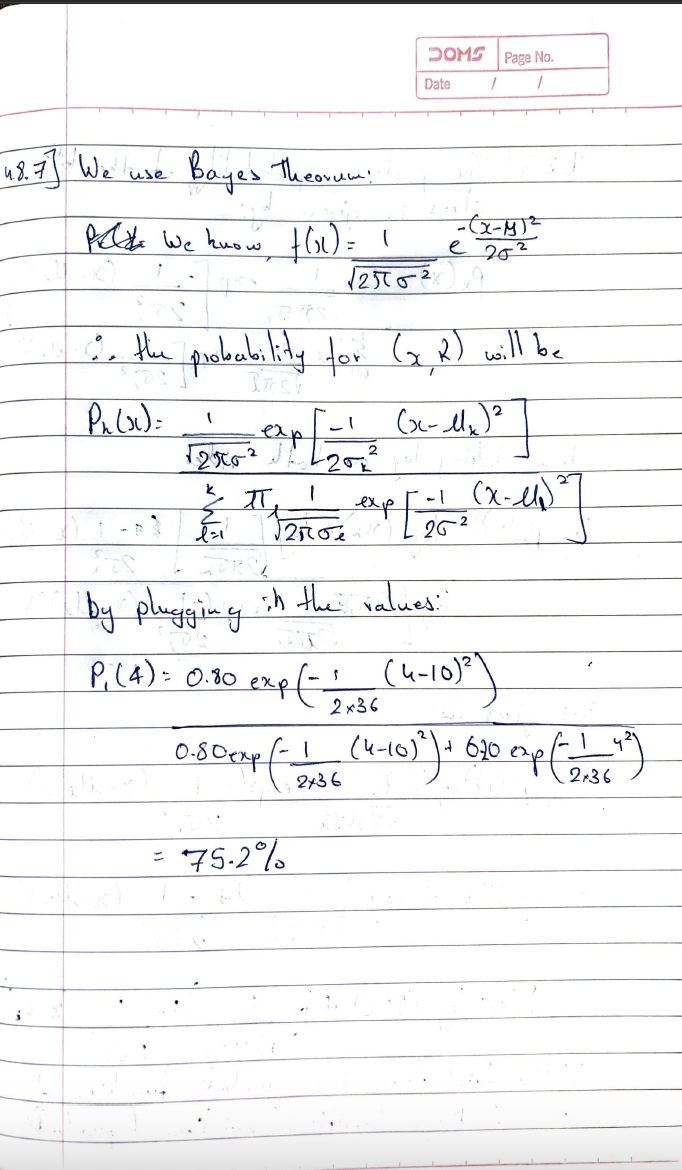